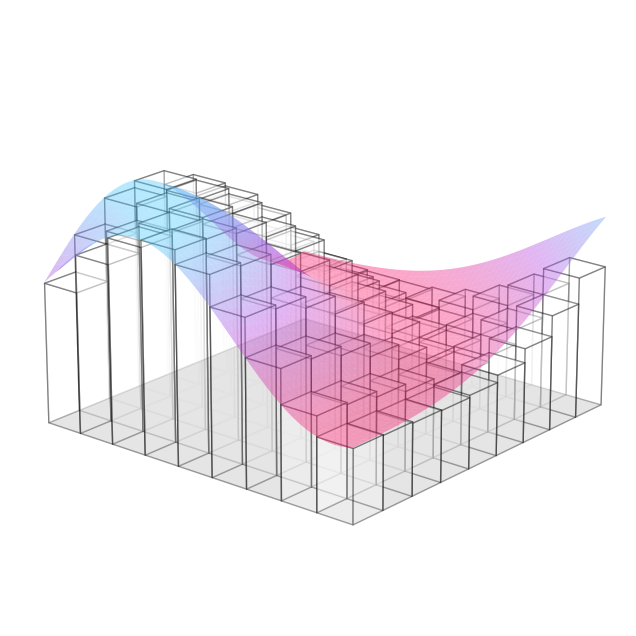

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from matplotlib.colors import LinearSegmentedColormap

# Define the surface function (smooth and controlled range)
def f(x, y):
    return np.sin(np.sqrt(x**2 + y**2)) * 0.5 + 1  # Scale the function for smaller range

# Create a linear colormap
colors = [(1, 27/255, 107/255), (181/255, 71/255, 225/255), (69/255, 202/255, 1)]  # FF1B6B to B547E1 to 45CAFF
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)

# Define the domain for integration
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Set up Riemann sums
x_riemann = np.linspace(0, 5, 10)  # Coarser grid for the Riemann sum
y_riemann = np.linspace(0, 5, 10)
X_r, Y_r = np.meshgrid(x_riemann, y_riemann)
Z_r = f(X_r, Y_r)

# Calculate the areas for the Riemann sum columns
dx = x_riemann[1] - x_riemann[0]
dy = y_riemann[1] - y_riemann[0]

# Create the figure and 3D axis
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the transparent surface with reduced range
ax.plot_surface(X, Y, Z, cmap=custom_cmap, alpha=0.4, edgecolor='none')  # Reduced alpha for transparency

# Add Riemann sum columns with higher transparency but visible edges
for i in range(len(x_riemann) - 1):
    for j in range(len(y_riemann) - 1):
        # Column position
        x0, y0 = X_r[i, j], Y_r[i, j]
        height = Z_r[i, j]
        # Vertices of the rectangle
        vertices = [
            [x0, y0, 0],
            [x0 + dx, y0, 0],
            [x0 + dx, y0 + dy, 0],
            [x0, y0 + dy, 0],
            [x0, y0, height],
            [x0 + dx, y0, height],
            [x0 + dx, y0 + dy, height],
            [x0, y0 + dy, height],
        ]
        vertices = np.array(vertices)

        # Faces of the column
        faces = [
            [vertices[0], vertices[1], vertices[5], vertices[4]],
            [vertices[1], vertices[2], vertices[6], vertices[5]],
            [vertices[2], vertices[3], vertices[7], vertices[6]],
            [vertices[3], vertices[0], vertices[4], vertices[7]],
            [vertices[4], vertices[5], vertices[6], vertices[7]],
        ]

        # Plot each face with transparency and visible edges
        for face in faces:
            poly3d = [[tuple(point) for point in face]]
            ax.add_collection3d(Poly3DCollection(poly3d, alpha=0.3, color='white', edgecolor='black', linewidths=1))

# Set plot limits and labels
ax.set_xlim(0, 5)
ax.set_ylim(0, 5)
ax.set_zlim(-0.25, 1.75)  # Adjust the z-limit for the smaller range of the function

# Remove axis labels and ticks
ax.set_xlabel('')  # Remove x-axis label
ax.set_ylabel('')  # Remove y-axis label
ax.set_zlabel('Z-axis')  # Optionally, keep z-axis label

# Remove the background color (gray)
fig.patch.set_facecolor('white')  # Set figure background to white
ax.set_facecolor('white')  # Set axes background to white

# Hide all axis ticks
ax.set_xticks([])  # Remove x-axis ticks
ax.set_yticks([])  # Remove y-axis ticks
ax.set_zticks([])  # Remove z-axis ticks

# Hide the grid and axes frame
ax.grid(False)  # Remove grid
ax.set_axis_off()  # Remove axis frame

# Add a square around the XY plane (at z=0)
square_vertices = [
    [0, 0, 0],
    [5, 0, 0],
    [5, 5, 0],
    [0, 5, 0],
    [0, 0, 0]  # Close the loop
]


# Create a Poly3DCollection for the square
square_poly = Poly3DCollection([square_vertices], alpha=0.1, color='black', edgecolor='black')
ax.add_collection3d(square_poly)

# Set the view angle (azimuth, elevation)
ax.view_init(azim=310, elev=20)  # You can adjust these values as needed

plt.savefig('2d-riemann-sum-updated.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


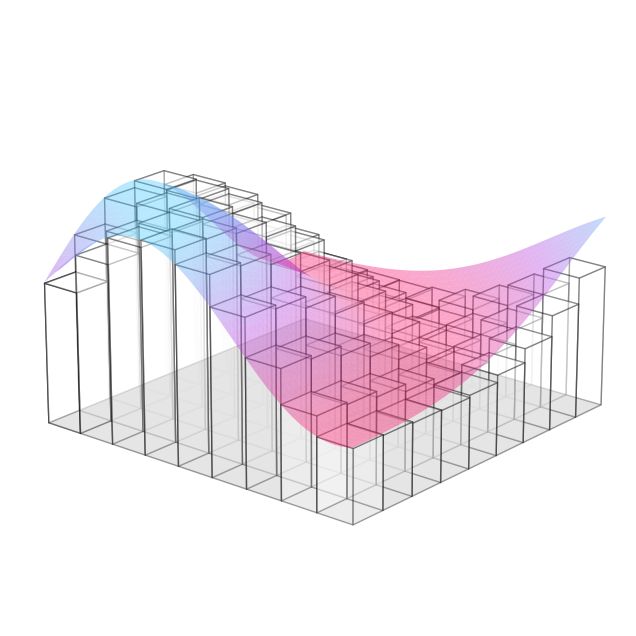

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.animation as animation

# Define the surface function (smooth and controlled range)
def f(x, y):
    return np.sin(np.sqrt(x**2 + y**2)) * 0.5 + 1  # Scale the function for smaller range

# Create a linear colormap
colors = [(1, 27/255, 107/255), (181/255, 71/255, 225/255), (69/255, 202/255, 1)]
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)

# Define the domain for the surface
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Define the domain for the Riemann sum columns (using a coarser grid)
x_riemann = np.linspace(0, 5, 10)
y_riemann = np.linspace(0, 5, 10)
X_r, Y_r = np.meshgrid(x_riemann, y_riemann)
Z_r = f(X_r, Y_r)

# Calculate the width and depth of each column
dx = x_riemann[1] - x_riemann[0]
dy = y_riemann[1] - y_riemann[0]

# Create the figure and 3D axis
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the transparent surface with the custom colormap
ax.plot_surface(X, Y, Z, cmap=custom_cmap, alpha=0.4, edgecolor='none')

# Add a square on the XY plane (at z=0)
square_vertices = [
    [0, 0, 0],
    [5, 0, 0],
    [5, 5, 0],
    [0, 5, 0],
    [0, 0, 0]  # Close the loop
]
square_poly = Poly3DCollection([square_vertices], alpha=0.1, color='black', edgecolor='black')
ax.add_collection3d(square_poly)

# Set plot limits and view
ax.set_xlim(0, 5)
ax.set_ylim(0, 5)
ax.set_zlim(-0.25, 1.75)
ax.view_init(azim=310, elev=20)

# Remove axis labels, ticks, grid, and the axes frame
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_zlabel('Z-axis')
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.grid(False)
ax.set_facecolor('white')
fig.patch.set_facecolor('white')
ax.set_axis_off()

# Pre-calculate the Riemann sum column collections.
# We'll create a list called 'columns' where each element is a list of Poly3DCollection objects (one per face).
columns = []
for i in range(len(x_riemann) - 1):
    for j in range(len(y_riemann) - 1):
        # Get the base position and the height from the function
        x0, y0 = X_r[i, j], Y_r[i, j]
        height = Z_r[i, j]
        # Define the 8 vertices of the column
        vertices = [
            [x0, y0, 0],
            [x0 + dx, y0, 0],
            [x0 + dx, y0 + dy, 0],
            [x0, y0 + dy, 0],
            [x0, y0, height],
            [x0 + dx, y0, height],
            [x0 + dx, y0 + dy, height],
            [x0, y0 + dy, height],
        ]
        vertices = np.array(vertices)

        # Define the five faces of the column (four sides and the top)
        faces = [
            [vertices[0], vertices[1], vertices[5], vertices[4]],  # Side 1
            [vertices[1], vertices[2], vertices[6], vertices[5]],  # Side 2
            [vertices[2], vertices[3], vertices[7], vertices[6]],  # Side 3
            [vertices[3], vertices[0], vertices[4], vertices[7]],  # Side 4
            [vertices[4], vertices[5], vertices[6], vertices[7]],  # Top
        ]

        # Create a list of Poly3DCollection objects (one for each face)
        column_polys = []
        for face in faces:
            # Convert each vertex to a tuple and create the collection for the face
            poly3d = [tuple(point) for point in face]
            pc = Poly3DCollection([poly3d], alpha=0.3, color='white', edgecolor='black', linewidths=1)
            column_polys.append(pc)
        # Append this column (a list of face collections) to the overall list
        columns.append(column_polys)

# Define the animation update function.
# Each frame will add one column (all of its faces) to the axis.
def update(frame):
    if frame < len(columns):
        for poly in columns[frame]:
            ax.add_collection3d(poly)
    return []  # With blit=False, the return value is not used

# Create the animation.
# We run for len(columns) frames (one per column) and add extra frames at the end to hold the final image.
num_frames = len(columns) + 10  # Extra frames for a pause at the end
anim = animation.FuncAnimation(fig, update, frames=num_frames, interval=100, blit=False)

# Save the animation as a GIF (requires the Pillow package)
anim.save('riemann_animation.gif', writer='pillow', dpi=300)

plt.show()


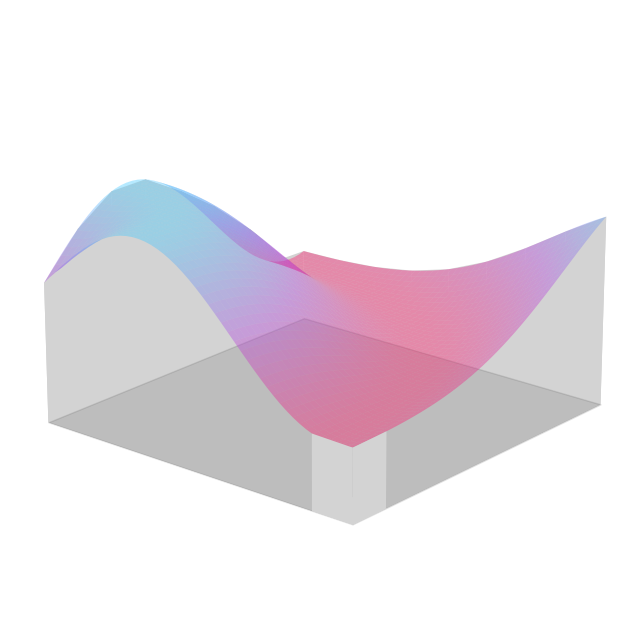

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.animation as animation

# -----------------------------
# 1. Define the function and colormap
# -----------------------------
def f(x, y):
    """A smooth function on [0,5]×[0,5]."""
    return np.sin(np.sqrt(x**2 + y**2)) * 0.5 + 1

# Create a custom linear colormap (from FF1B6B to B547E1 to 45CAFF)
colors = [(1, 27/255, 107/255), (181/255, 71/255, 225/255), (69/255, 202/255, 1)]
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)

# -----------------------------
# 2. Set up the domain and compute the surface
# -----------------------------
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# -----------------------------
# 3. Create the figure and base 3D plot
# -----------------------------
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the function surface (with your custom colormap and some transparency)
ax.plot_surface(X, Y, Z, cmap=custom_cmap, alpha=0.4, edgecolor='none')

# Add a square along the base (z=0) as a “shadow.”
square_vertices = [
    [0, 0, 0],
    [5, 0, 0],
    [5, 5, 0],
    [0, 5, 0],
    [0, 0, 0]  # Close the loop
]
base_poly = Poly3DCollection([square_vertices], alpha=0.1,
                             facecolor='black', edgecolor='black')
base_poly.set_zorder(10)  # Keep it on top of other fills
ax.add_collection3d(base_poly)

# Set viewing limits and angle
ax.set_xlim(0, 5)
ax.set_ylim(0, 5)
ax.set_zlim(-0.25, 1.75)
ax.view_init(azim=310, elev=20)

# Remove ticks, labels, grid, and axis frame for a clean look
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_zlabel('Z-axis')
ax.grid(False)
ax.set_facecolor('white')
fig.patch.set_facecolor('white')
ax.set_axis_off()

# -----------------------------
# 4. Define the evolving (morphing) gray plane
# -----------------------------
# An initial inclined plane (feel free to adjust)
Z_init = 0.2 * X + 0.1 * Y + 0.5

# -----------------------------
# 5. Animation parameters
# -----------------------------
total_frames = 40       # Total frames (4 sec at 100 ms per frame)
transition_frames = 30  # Frames to morph the plane to the function surface
fade_frames = 5         # Frames to fade out the plane
# The fill phase will then occur in the remaining frames.
fill_anim_frames = 5    # Number of frames over which the fill appears

# Global holders for the evolving gray plane and for the fill artists.
plane_artist = None

# For the fill, we use three globals:
#   fill_artists_all: list of tuples (priority, poly) for all fill polygons.
#   fill_artists_sorted: sorted version (descending order of priority).
#   fill_added_count: how many fill polygons have been added so far.
fill_artists_all = None
fill_artists_sorted = None
fill_added_count = 0

# -----------------------------
# 6. Create fill artists for the volume under the function surface
# -----------------------------
def create_fill_artists():
    """
    Build a set of polygons that approximate the closed 3D volume under the surface,
    i.e. for (x,y) in [0,5]×[0,5] from z=0 up to z=f(x,y). For a coarse grid (n_fill×n_fill
    cells), for each cell we add:
      - the base face (at z=0) and
      - the four vertical side faces.
    Each polygon is paired with a priority value: for vertical faces this is the maximum z
    of the cell's top edge; for the base face, we assign priority 0.
    """
    artists = []
    n_fill = 8  # coarse grid; increase for a smoother fill if desired.
    x_fill = np.linspace(0, 5, n_fill + 1)
    y_fill = np.linspace(0, 5, n_fill + 1)

    for i in range(n_fill):
        for j in range(n_fill):
            # Compute the top face vertices (on the function surface)
            A_top = (x_fill[i],   y_fill[j],   f(x_fill[i],   y_fill[j]))
            B_top = (x_fill[i+1], y_fill[j],   f(x_fill[i+1], y_fill[j]))
            C_top = (x_fill[i+1], y_fill[j+1], f(x_fill[i+1], y_fill[j+1]))
            D_top = (x_fill[i],   y_fill[j+1], f(x_fill[i],   y_fill[j+1]))
            cell_priority = max(A_top[2], B_top[2], C_top[2], D_top[2])

            # Bottom face (base of the cell): priority = 0
            bottom_face = [
                (x_fill[i],   y_fill[j],   0),
                (x_fill[i+1], y_fill[j],   0),
                (x_fill[i+1], y_fill[j+1], 0),
                (x_fill[i],   y_fill[j+1], 0)
            ]
            poly_bottom = Poly3DCollection([bottom_face],
                                           facecolor='lightgray', edgecolor='none', alpha=1)
            poly_bottom.set_zorder(-10)
            artists.append((0, poly_bottom))

            # Vertical faces (each gets the cell's priority)
            # Face 1: between A and B
            face1 = [
                (x_fill[i],   y_fill[j],   0),
                (x_fill[i+1], y_fill[j],   0),
                (x_fill[i+1], y_fill[j],   f(x_fill[i+1], y_fill[j])),
                (x_fill[i],   y_fill[j],   f(x_fill[i], y_fill[j]))
            ]
            poly1 = Poly3DCollection([face1],
                                     facecolor='lightgray', edgecolor='none', alpha=1)
            poly1.set_zorder(-10)
            artists.append((cell_priority, poly1))

            # Face 2: between B and C
            face2 = [
                (x_fill[i+1], y_fill[j],   0),
                (x_fill[i+1], y_fill[j+1], 0),
                (x_fill[i+1], y_fill[j+1], f(x_fill[i+1], y_fill[j+1])),
                (x_fill[i+1], y_fill[j],   f(x_fill[i+1], y_fill[j]))
            ]
            poly2 = Poly3DCollection([face2],
                                     facecolor='lightgray', edgecolor='none', alpha=1)
            poly2.set_zorder(-10)
            artists.append((cell_priority, poly2))

            # Face 3: between C and D
            face3 = [
                (x_fill[i+1], y_fill[j+1], 0),
                (x_fill[i],   y_fill[j+1], 0),
                (x_fill[i],   y_fill[j+1], f(x_fill[i], y_fill[j+1])),
                (x_fill[i+1], y_fill[j+1], f(x_fill[i+1], y_fill[j+1]))
            ]
            poly3 = Poly3DCollection([face3],
                                     facecolor='lightgray', edgecolor='none', alpha=1)
            poly3.set_zorder(-10)
            artists.append((cell_priority, poly3))

            # Face 4: between D and A
            face4 = [
                (x_fill[i],   y_fill[j+1], 0),
                (x_fill[i],   y_fill[j],   0),
                (x_fill[i],   y_fill[j],   f(x_fill[i], y_fill[j])),
                (x_fill[i],   y_fill[j+1], f(x_fill[i], y_fill[j+1]))
            ]
            poly4 = Poly3DCollection([face4],
                                     facecolor='lightgray', edgecolor='none', alpha=1)
            poly4.set_zorder(-10)
            artists.append((cell_priority, poly4))
    return artists

# -----------------------------
# 7. Define the animation update function
# -----------------------------
def update(frame):
    global plane_artist, fill_artists_all, fill_artists_sorted, fill_added_count

    # Remove the previous gray plane, if any
    if plane_artist is not None:
        try:
            plane_artist.remove()
        except Exception as e:
            print("Error removing plane_artist:", e)
        plane_artist = None

    # Phase 1: Morph the gray plane (frames 0 to transition_frames-1)
    if frame < transition_frames:
        t = frame / (transition_frames - 1)  # t goes from 0 to 1
        Z_current = (1 - t) * Z_init + t * Z
        plane_artist = ax.plot_surface(X, Y, Z_current, color='gray',
                                       alpha=0.5, edgecolor='none')

    # Phase 2: Fade out the gray plane (frames transition_frames to transition_frames+fade_frames-1)
    elif frame < transition_frames + fade_frames:
        fade_t = (frame - transition_frames) / (fade_frames - 1)
        current_alpha = 0.5 * (1 - fade_t)
        plane_artist = ax.plot_surface(X, Y, Z, color='gray',
                                       alpha=current_alpha, edgecolor='none')

    # Phase 3: Gradually add the light-gray fill from the top down.
    else:
        # Initialize fill artists on the first frame of Phase 3
        if fill_artists_all is None:
            fill_artists_all = create_fill_artists()  # list of (priority, poly)
            fill_artists_sorted = sorted(fill_artists_all, key=lambda tup: tup[0], reverse=True)
            fill_added_count = 0

        # Determine the current progress in the fill animation.
        phase3_frame = frame - (transition_frames + fade_frames)
        total_fill = len(fill_artists_sorted)
        # Compute the number of fill polygons to add (progresses quickly over fill_anim_frames)
        new_count = int(min(((phase3_frame + 1) / fill_anim_frames) * total_fill, total_fill))

        # Add any new fill polygons that haven't been added yet.
        for idx in range(fill_added_count, new_count):
            artist = fill_artists_sorted[idx][1]
            ax.add_collection3d(artist)
        fill_added_count = new_count

    return []  # Not using blit

# -----------------------------
# 8. Create and save the animation
# -----------------------------
anim = animation.FuncAnimation(fig, update, frames=total_frames, interval=100, blit=False)
anim.save('filled_volume_animation.gif', writer='pillow', dpi=300)

plt.show()


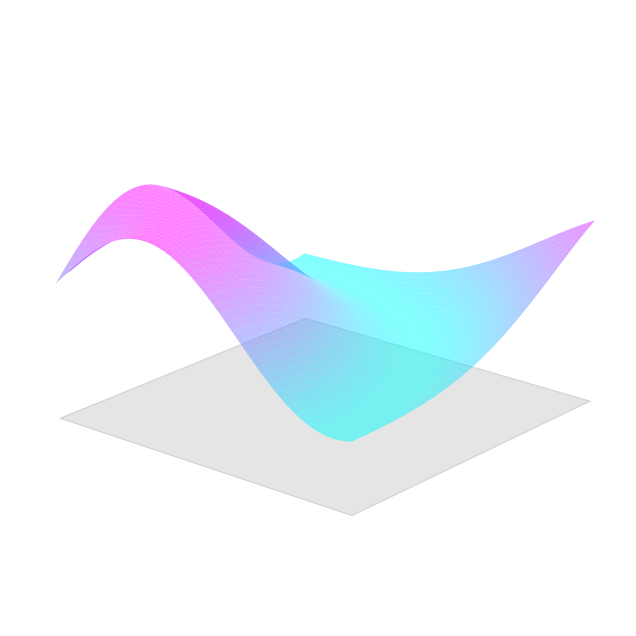

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Define the surface function (smooth and controlled range)
def f(x, y):
    return np.sin(np.sqrt(x**2 + y**2)) * 0.5 + 1  # Scale the function for smaller range

# Define the domain for integration
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Set up Riemann sums
x_riemann = np.linspace(0, 5, 10)  # Coarser grid for the Riemann sum
y_riemann = np.linspace(0, 5, 10)
X_r, Y_r = np.meshgrid(x_riemann, y_riemann)
Z_r = f(X_r, Y_r)

# Calculate the areas for the Riemann sum columns
dx = x_riemann[1] - x_riemann[0]
dy = y_riemann[1] - y_riemann[0]

# Create the figure and 3D axis
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the Riemann sum alone
ax.set_xlim(0, 5)
ax.set_ylim(0, 5)
ax.set_zlim(-0.25, 1.75)  # Adjust the z-limit for the smaller range of the function

# Add Riemann sum columns with higher transparency but visible edges
for i in range(len(x_riemann) - 1):
    for j in range(len(y_riemann) - 1):
        # Column position
        x0, y0 = X_r[i, j], Y_r[i, j]
        height = Z_r[i, j]
        # Vertices of the rectangle
        vertices = [
            [x0, y0, 0],
            [x0 + dx, y0, 0],
            [x0 + dx, y0 + dy, 0],
            [x0, y0 + dy, 0],
            [x0, y0, height],
            [x0 + dx, y0, height],
            [x0 + dx, y0 + dy, height],
            [x0, y0 + dy, height],
        ]
        vertices = np.array(vertices)

        # Faces of the column
        faces = [
            [vertices[0], vertices[1], vertices[5], vertices[4]],
            [vertices[1], vertices[2], vertices[6], vertices[5]],
            [vertices[2], vertices[3], vertices[7], vertices[6]],
            [vertices[3], vertices[0], vertices[4], vertices[7]],
            [vertices[4], vertices[5], vertices[6], vertices[7]],
        ]

        # Plot each face with transparency and visible edges
        for face in faces:
            poly3d = [[tuple(point) for point in face]]
            ax.add_collection3d(Poly3DCollection(poly3d, alpha=0.3, color='white', edgecolor='black', linewidths=1))

# Hide the surface plot and add only the Riemann sum
ax.plot_surface(X, Y, Z, alpha=0)  # Hide the surface

# Remove axis labels, ticks, and grid for the Riemann sum plot
ax.set_xticks([])  # Remove x-axis ticks
ax.set_yticks([])  # Remove y-axis ticks
ax.set_zticks([])  # Remove z-axis ticks
ax.set_axis_off()  # Remove axis frame
ax.grid(False)  # Remove grid
ax.set_facecolor('white')  # Set axes background to white

# Add a square around the XY plane (at z=0)
square_vertices = [
    [0, 0, 0],
    [5, 0, 0],
    [5, 5, 0],
    [0, 5, 0],
    [0, 0, 0]  # Close the loop
]
square_poly = Poly3DCollection([square_vertices], alpha=0.1, color='black', edgecolor='black')
ax.add_collection3d(square_poly)

# Set the view angle (azimuth, elevation) as used in the original code
ax.view_init(azim=120+10+180, elev=20)  # Adjusted view angle for consistency

# Save the image with only Riemann sum
plt.savefig('riemann_sum_only.png', dpi=300, bbox_inches='tight')

# Clear the current axis for the second plot (surface only)
ax.clear()

# Plot the surface alone
ax.plot_surface(X, Y, Z, cmap='cool', alpha=0.5, edgecolor='none')  # Reduced alpha for transparency

# Re-apply the same limits and formatting
ax.set_xlim(0, 5)
ax.set_ylim(0, 5)
ax.set_zlim(-0.25, 1.75)  # Adjust the z-limit for the smaller range of the function

# Hide axis labels, ticks, and grid for the surface plot
ax.set_xticks([])  # Remove x-axis ticks
ax.set_yticks([])  # Remove y-axis ticks
ax.set_zticks([])  # Remove z-axis ticks
ax.set_axis_off()  # Remove axis frame
ax.grid(False)  # Remove grid
ax.set_facecolor('white')  # Set axes background to white

# Add a square around the XY plane (at z=0)
ax.add_collection3d(square_poly)

# Save the image with only the surface
plt.savefig('surface_only.png', dpi=300, bbox_inches='tight')

# Show the plot (optional)
plt.show()


In [ ]:
from PIL import Image
import numpy as np

# Open the two images
image1 = Image.open('riemann_sum_only.png')
image2 = Image.open('surface_only.png')

# Ensure both images are the same size
if image1.size != image2.size:
    raise ValueError("Images must have the same dimensions.")

# Get the width and height of the images
width, height = image1.size

# Create a gradient for the fade effect (half-width of the image)
fade_width = int(width / 2)

# Convert both images to numpy arrays for manipulation
image1_array = np.array(image1)
image2_array = np.array(image2)

# Create a gradient mask for fading effect
gradient = np.zeros((height, fade_width), dtype=np.float32)

# Generate a linear gradient that fades from 0 to 1
for i in range(fade_width):
    gradient[:, i] = i / fade_width

# Create a final blended image
final_image = np.zeros_like(image1_array)

# Left half (Riemann sum image)
final_image[:, :fade_width] = image1_array[:, :fade_width]

# Right half (Surface image) with fade
for i in range(fade_width, width):
    alpha = gradient[:, i - fade_width]  # Get the fade factor for this column
    for c in range(3):  # Loop through each color channel (RGB)
        final_image[:, i, c] = (image1_array[:, i, c] * (1 - alpha) + image2_array[:, i, c] * alpha).astype(np.uint8)

# Convert the result back to an image
final_image = Image.fromarray(final_image)

# Save the final image
final_image.save('final_fade_image.png')

# Show the final image
final_image.show()


IndexError: index 953 is out of bounds for axis 1 with size 953

In [ ]:
!pip install keras

In [ ]:
import tensorflow as tf
import numpy as np
import math
import keras
import matplotlib.pyplot as plt
import imageio.v2 as imageio
import os

from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.initializers import RandomNormal
from tensorflow.math import squared_difference
from tensorflow.math import square
from scipy.stats import norm

keras.utils.set_random_seed(28)

# Hyperparameters
batch_size = 1
epochs = 12
optimizer = Adam(learning_rate=0.0005)
weight_init = RandomNormal()

xCDF = np.arange(-10, 10, 0.5)
yCDF = norm.cdf(xCDF)

# Build model
inputs = tf.keras.Input(shape=(1,))
x = Dense(512, activation='gelu', kernel_initializer=weight_init)(inputs)
x = Dense(512, activation='gelu', kernel_initializer=weight_init)(x)
output = Dense(1, activation='linear', kernel_initializer=weight_init)(x)
model = tf.keras.Model(inputs, output)

mu = 0.0
sigma = 1.0
# Function to be integrated
def f_tbi(x_coloc):
    return (1 / (sigma * np.sqrt(2 * math.pi))) * np.exp(-0.5 * ((x_coloc - mu) / sigma)**2)

x_coloc = np.arange(-10, 10, 0.2)
rng = np.random.default_rng()
rng.shuffle(x_coloc)
y_coloc = f_tbi(x_coloc)

# Initial conditions
x_init = np.array([-10.0])
h_init = np.array([0.0])
x_init2 = np.array([10.0])
h_init2 = np.array([1.0])

# Colors for customization
color_input_points = 'red'   # Customize color of input points (PDF)
color_actual_cdf = 'green'   # Customize color of actual CDF
color_predicted_cdf = 'blue' # Customize color of predicted CDF

# Training loop
losses = []

def step(x_co, y_co, x_init, h_init, x_init2, h_init2):
    x_co = tf.convert_to_tensor(x_co)
    x_co = tf.reshape(x_co, [batch_size, 1])  # required by keras input
    x_co = tf.Variable(x_co, name='x_co')
    with tf.GradientTape(persistent=True) as tape:

        # model_loss1: initial condition h_init @ x_init
        pred_init = model(x_init)
        model_loss1 = squared_difference(pred_init, h_init)

        # model_loss3: initial condition h_init2 @ x_init2
        pred_init2 = model(x_init2)
        model_loss3 = squared_difference(pred_init2, h_init2)

        # model_loss2: collocation points
        pred_h = model(x_co)
        dfdx = tape.gradient(pred_h, x_co)
        residual = dfdx - y_co
        model_loss2 = tf.reduce_mean(tf.square(residual), axis=-1)  # Fix: replace K.mean with tf.reduce_mean
        model_loss2 = tf.cast(model_loss2, tf.float32)

        # total loss
        model_loss = model_loss1*0.0 + model_loss3*0.0 + model_loss2 * 1

        trainable = model.trainable_variables
        model_gradients = tape.gradient(model_loss, trainable)

        # Update model
        optimizer.apply_gradients(zip(model_gradients, trainable))
        return np.mean(model_loss)

for epoch in range(epochs):
    total_loss = 0
    for i in range(len(x_coloc)):
        x_co_batch = x_coloc[i:i+batch_size]
        y_co_batch = y_coloc[i:i+batch_size]
        loss = step(x_co_batch, y_co_batch, x_init, h_init, x_init2, h_init2)
        total_loss += loss
    avg_loss = total_loss / len(x_coloc)
    losses.append(avg_loss)
    print(f"Epoch {epoch}, Loss: {avg_loss}")

# Generate final plot (high res, no axes, labels, legend, grid, etc.)
x_test = np.linspace(-10, 10, 1000)
y_pred = model.predict(x_test)

plt.figure(figsize=(10, 6))
plt.plot(x_coloc, y_coloc, "ro", label='Network Inputs (PDF)', markersize=1.5, color=color_input_points)
plt.plot(xCDF, yCDF, label="Actual CDF", color=color_actual_cdf)
plt.plot(x_test, y_pred, label='Predicted CDF', linestyle='--', color=color_predicted_cdf)

# Remove axes labels, ticks, and legend
plt.xticks([])  # No x-axis ticks
plt.yticks([])  # No y-axis ticks
plt.xlabel('')  # Remove x-label
plt.ylabel('')  # Remove y-label
plt.title('Final Network Output')

# Save the plot in high resolution
plt.savefig('final_network_output.png', dpi=300, bbox_inches='tight', transparent=True)
plt.close()

print("Final frame saved as 'final_network_output.png'")
color_input_points = 'red'   # Customize color of input points (PDF)
color_actual_cdf = 'green'   # Customize color of actual CDF
color_predicted_cdf = 'blue' # Customize color of predicted CDF

Epoch 0, Loss: 0.013222936946128812
Epoch 1, Loss: 0.009150069542873816
Epoch 2, Loss: 0.008271111682856968
Epoch 3, Loss: 0.007163840981826297
Epoch 4, Loss: 0.005890540737857464
Epoch 5, Loss: 0.004515301848343824
Epoch 6, Loss: 0.0032424493542558253
Epoch 7, Loss: 0.002248395034470718
Epoch 8, Loss: 0.0015074555278303593
Epoch 9, Loss: 0.0009447186573352784
Epoch 10, Loss: 0.0005496030789481888
Epoch 11, Loss: 0.0003104511690731648
32/32 [==============================] - 0s 2ms/step


<ipython-input-26-da474bf333f3>:108: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_coloc, y_coloc, "ro", label='Network Inputs (PDF)', markersize=1.5, color=color_input_points)


Final frame saved as 'final_network_output.png'


In [ ]:
# Colors for customization
color_input_points = '#FF1B6B'   # Customize color of input points (PDF)
color_actual_cdf = '#45CAFF'   # Customize color of actual CDF
color_predicted_cdf = '#B547E1' # Customize color of predicted CDF

plt.figure(figsize=(10, 6))
plt.plot(x_coloc, y_coloc, "ro", label='Network Inputs (PDF)', markersize=4, color=color_input_points)
plt.plot(xCDF, yCDF, label="Actual CDF", color=color_actual_cdf, linewidth=4)
plt.plot(x_test, y_pred, label='Predicted CDF', linestyle='--', color=color_predicted_cdf, linewidth=4)
#plt.scatter(x_init2-0.5, h_init2, color="#21D19F", s=150, label='Initial Conditions (Anchors)')
#plt.scatter(x_init, h_init, color="#21D19F", s=150, label='Initial Conditions (Anchors)')

# Remove axes labels, ticks, and legend
plt.xticks([])  # No x-axis ticks
plt.yticks([])  # No y-axis ticks
plt.xlabel('')  # Remove x-label
plt.ylabel('')  # Remove y-label
plt.title('')

# Save the plot in high resolution
plt.savefig('final_network_output.png', dpi=300, bbox_inches='tight', transparent=True)
plt.close()

print("Final frame saved as 'final_network_output.png'")

<ipython-input-27-7593e4cf2d00>:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_coloc, y_coloc, "ro", label='Network Inputs (PDF)', markersize=4, color=color_input_points)


Final frame saved as 'final_network_output.png'


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Create a reversed colormap from FF1B6B to 45CAFF
cmap = mcolors.LinearSegmentedColormap.from_list(
    "custom_cmap", ["#45CAFF", "#FF1B6B"], N=256
)

# Set the domain for the square grid (0 to 1)
domain_size = 1
num_grid_points = 20  # Number of points for the regular grid (adjust to control the grid size)

# Create the evenly spaced grid of points (same grid as the evenly distributed points)
x_points = np.linspace(0, domain_size, num_grid_points)
y_points = np.linspace(0, domain_size, num_grid_points)
X_grid, Y_grid = np.meshgrid(x_points, y_points)

# Adjust the spacing for each point
adjusted_x = []
adjusted_y = []

# Exclude the outermost points by starting from 1 and going until num_grid_points - 1
for i in range(1, num_grid_points - 1):  # Exclude outermost rows
    for j in range(1, num_grid_points - 1):  # Exclude outermost columns
        # Adjust x position: More space in bottom left, less space in top right
        x_adjustment = X_grid[i, j] * 0.95*(1 - X_grid[i, j])-0.05
        y_adjustment = Y_grid[i, j] * 0.95*(1 - Y_grid[i, j])-0.05

        # Apply the adjustment to both x and y
        adjusted_x.append(X_grid[i, j] + x_adjustment)
        adjusted_y.append(Y_grid[i, j] + y_adjustment)

# Convert the list to numpy arrays for easier plotting
adjusted_x = np.array(adjusted_x)
adjusted_y = np.array(adjusted_y)

# Create the figure for the plot
plt.figure(figsize=(6, 6))

# Plot the density-adjusted points (use the color B547E1 for the points)
plt.scatter(adjusted_x, adjusted_y, color="#B547E1", s=10)  # Adjust size of points

# Add black border around the plot
plt.plot([0, domain_size], [0, 0], color='black', lw=1)  # Bottom border
plt.plot([0, domain_size], [domain_size, domain_size], color='black', lw=1)  # Top border
plt.plot([0, 0], [0, domain_size], color='black', lw=1)  # Left border
plt.plot([domain_size, domain_size], [0, domain_size], color='black', lw=1)  # Right border

# Remove all labels, ticks, and grid lines
plt.axis('off')
plt.gca().set_aspect('equal', adjustable='box')
plt.gcf().set_facecolor((0, 0, 0, 0))  # Make the background transparent

# Save the density plot image
plt.savefig('FINAL_density_based_on_vector_length_with_adjusted_spacing_no_outer_layer.png', dpi=300, bbox_inches='tight', transparent=True)
plt.close()

print("Density-based image with adjusted spacing (no outer layer) saved as 'FINAL_density_based_on_vector_length_with_adjusted_spacing_no_outer_layer.png'")


Density-based image with adjusted spacing (no outer layer) saved as 'FINAL_density_based_on_vector_length_with_adjusted_spacing_no_outer_layer.png'


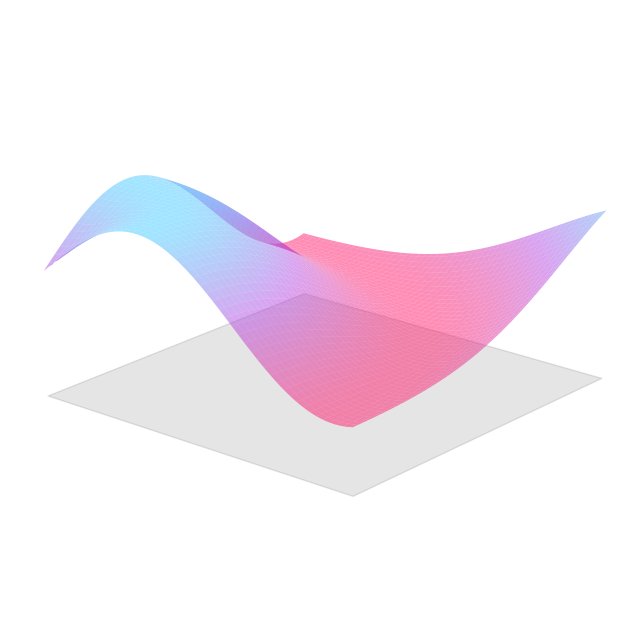

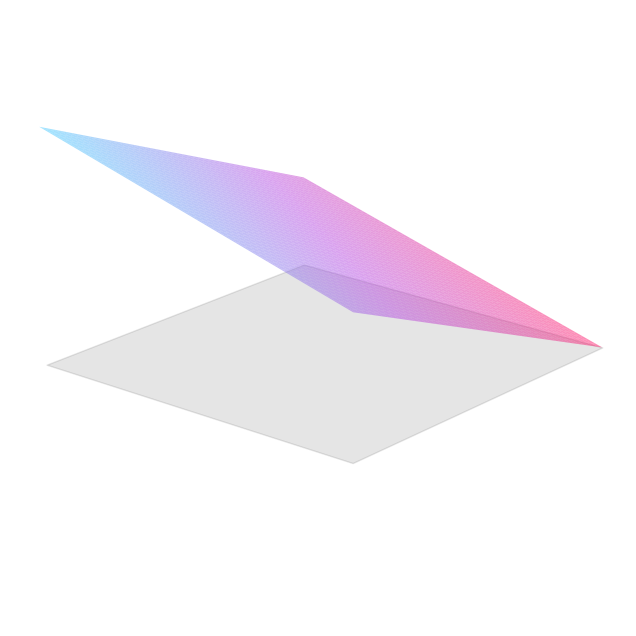

Two plots saved: 'FINAL_curved_surface_with_square.png' and 'FINAL_flat_surface_with_square.png'


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Define custom colormap
colors = [(1, 27/255, 107/255), (181/255, 71/255, 225/255), (69/255, 202/255, 1)]  # FF1B6B to B547E1 to 45CAFF
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)

# Define the surface function for the curved surface (sinusoidal surface)
def f(x, y):
    return np.sin(np.sqrt(x**2 + y**2)) * 0.5 + 1  # Curved surface

# Define the flat surface function (create a plane with slope)
def f_flat(x, y):
    return 0.2 * x + 0.3 * y  # Linear gradient to create a plane

# Define the domain for the square grid (0 to 5)
x = np.linspace(0, 5, 100)
y = np.linspace(0, 5, 100)
X, Y = np.meshgrid(x, y)

# Calculate the Z-values for both surfaces
Z_curved = f(X, Y)
Z_flat = f_flat(X, Y)

# Create the figure for the first surface plot (curved surface)
fig1 = plt.figure(figsize=(12, 8))
ax1 = fig1.add_subplot(111, projection='3d')

# Plot the curved surface
ax1.plot_surface(X, Y, Z_curved, cmap=custom_cmap, alpha=0.5, edgecolor='none')  # Curved surface with transparency

# Set plot limits and labels for figure 1
ax1.set_xlim(0, 5)
ax1.set_ylim(0, 5)
ax1.set_zlim(-0.5, 1.75)  # Adjust z-limits to fit the curved surface

# Remove axis labels and ticks for figure 1
ax1.set_xlabel('')  # Remove x-axis label
ax1.set_ylabel('')  # Remove y-axis label
ax1.set_zlabel('Z-axis')  # Optionally, keep z-axis label

# Remove the background color (gray)
fig1.patch.set_facecolor('white')  # Set figure background to white
ax1.set_facecolor('white')  # Set axes background to white

# Hide all axis ticks for figure 1
ax1.set_xticks([])  # Remove x-axis ticks
ax1.set_yticks([])  # Remove y-axis ticks
ax1.set_zticks([])  # Remove z-axis ticks

# Hide the grid and axes frame for figure 1
ax1.grid(False)  # Remove grid
ax1.set_axis_off()  # Remove axis frame

# Add a square around the XY plane (at z=0)
square_vertices = [
    [0, 0, 0],
    [5, 0, 0],
    [5, 5, 0],
    [0, 5, 0],
    [0, 0, 0]  # Close the loop
]

# Create a new Poly3DCollection for the square for figure 1
square_poly = Poly3DCollection([square_vertices], alpha=0.1, color='black', edgecolor='black')
ax1.add_collection3d(square_poly)

# Set the view angle (azimuth, elevation) for figure 1
ax1.view_init(azim=120+10+180, elev=20)  # Set the view to make the surface visible at a nice angle

# Save the first figure
plt.savefig('FINAL_curved_surface_with_square.png', dpi=300, bbox_inches='tight', transparent=True)

# Create the figure for the second flat surface plot (slightly angled)
fig2 = plt.figure(figsize=(12, 8))
ax2 = fig2.add_subplot(111, projection='3d')

# Plot the flat surface at an angle
ax2.plot_surface(X, Y, Z_flat, cmap=custom_cmap, alpha=0.5, edgecolor='none')  # Flat surface with transparency

# Set plot limits and labels for figure 2
ax2.set_xlim(0, 5)
ax2.set_ylim(0, 5)
ax2.set_zlim(-1, 2)  # Adjust z-limit for the flat surface

# Remove axis labels and ticks for figure 2
ax2.set_xlabel('')  # Remove x-axis label
ax2.set_ylabel('')  # Remove y-axis label
ax2.set_zlabel('Z-axis')  # Optionally, keep z-axis label

# Remove the background color (gray)
fig2.patch.set_facecolor('white')  # Set figure background to white
ax2.set_facecolor('white')  # Set axes background to white

# Hide all axis ticks for figure 2
ax2.set_xticks([])  # Remove x-axis ticks
ax2.set_yticks([])  # Remove y-axis ticks
ax2.set_zticks([])  # Remove z-axis ticks

# Hide the grid and axes frame for figure 2
ax2.grid(False)  # Remove grid
ax2.set_axis_off()  # Remove axis frame

# Add a square around the XY plane (at z=0) for figure 2
square_poly_2 = Poly3DCollection([square_vertices], alpha=0.1, color='black', edgecolor='black')
ax2.add_collection3d(square_poly_2)

# Set the view angle (azimuth, elevation) for figure 2
ax2.view_init(azim=120+10, elev=20)  # Same angle as figure 1

# Save the second figure
plt.savefig('FINAL_flat_surface_with_square.png', dpi=300, bbox_inches='tight', transparent=True)

# Show the plots
plt.show()

print("Two plots saved: 'FINAL_curved_surface_with_square.png' and 'FINAL_flat_surface_with_square.png'")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Number of integrals to calculate
num_integrals = 100

# Create x values (number of integrals)
x = np.arange(1, num_integrals + 1)

# Initialize the figure
plt.figure(figsize=(10, 8))

# Function for the "normal" method (linear)
def normal_method(n, slope, intercept):
    noise = np.random.normal(scale=0.5, size=n)  # adding some noise for each point
    return slope * x + intercept + noise  # adding noise to the calculation for each point

# Function for the "new" method (initial slow, then faster)
def new_method(n, initial_cost, slope, intercept):
    noise = np.random.normal(scale=0.5, size=n)  # adding some noise for each point
    future_cost = slope * x + intercept  # time decreases over n integrals
    return initial_cost + future_cost + noise  # adding noise to the calculation for each point

# Labels for the sets
sets = ['Sm', 'O', 'Si', 'Hd', 'K']

# Parameters for each set (slope, intercept, initial_cost)
params = {
    'Sm': {'normal_slope': 0.2, 'normal_intercept': 1, 'new_initial_cost': 15, 'new_slope': 0.03, 'new_intercept': 2},
    'O': {'normal_slope': 0.3, 'normal_intercept': 1, 'new_initial_cost': 25, 'new_slope': 0.05, 'new_intercept': 3},
    'Si': {'normal_slope': 0.25, 'normal_intercept': 1, 'new_initial_cost': 10, 'new_slope': 0.04, 'new_intercept': 1.5},
    'Hd': {'normal_slope': 0.35, 'normal_intercept': 0.5, 'new_initial_cost': 30, 'new_slope': 0.02, 'new_intercept': 2.5},
    'K': {'normal_slope': 0.28, 'normal_intercept': 1.2, 'new_initial_cost': 20, 'new_slope': 0.06, 'new_intercept': 1}
}

# Loop to plot each of the 5 sets
for i, label in enumerate(sets):
    # Get the parameters for the current set
    normal_params = params[label]

    # "normal" method times
    normal_times = normal_method(x, normal_params['normal_slope'], normal_params['normal_intercept'])

    # "new" method times
    new_times = new_method(x, normal_params['new_initial_cost'], normal_params['new_slope'], normal_params['new_intercept'])

    # Plot the control and new method lines
    plt.plot(x, normal_times, label=f'{label} Control', linestyle='-', color=f'C{i*2}')
    plt.plot(x, new_times, label=f'{label} New', linestyle='--', color=f'C{i*2+1}')

# Set axis labels and title
plt.xlabel("Number of Integrals")
plt.ylabel("Time Taken (Milliseconds)")
plt.title("Comparison of Integration Methods")

# Show legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


ValueError: maximum supported dimension for an ndarray is 32, found 100

<Figure size 1000x800 with 0 Axes>

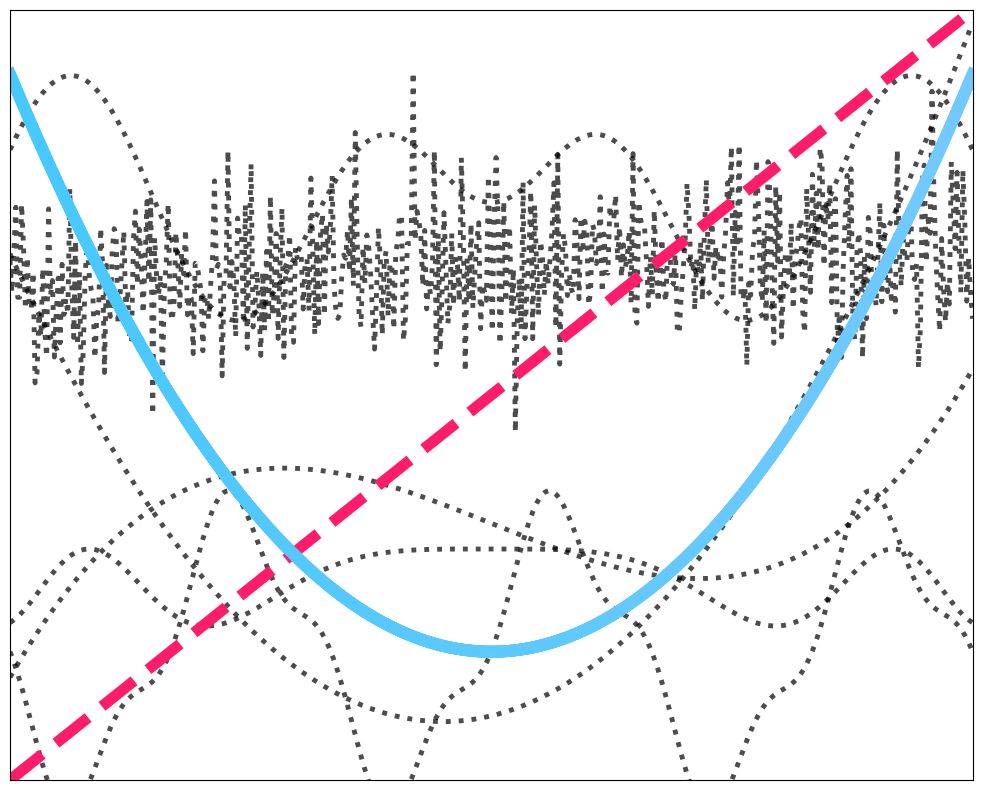

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the range and functions
x = np.linspace(-3, 3, 500)
y_line = x
y_integral = x**2 / 2 - 2  # Shifted down by 2 units

# Generate unique error approximations of the integral
np.random.seed(42)
y_error_lines = [
    -2 + np.sin(x * np.pi) * (1 + 0.5 * np.sin(2 * np.pi * x)),  # Sinusoidal-like with variable amplitude
    -1 + 0.1 * x**3 - 0.5 * x,  # Cubic-like function
    1.5 + np.tanh(x) * np.sin(3 * x),  # Weird tanh-sinusoidal mix, shifted higher up
    -1.5 + 0.3 * np.cos(x**2),  # Another non-standard oscillatory function
    x**2 / 2 - 2.5 + 0.3 * x,  # Parabola-like, curves down on the right
    1 + 0.5 * np.sin(0.1 * x) + 0.2 * np.random.normal(0, 2, len(x))  # Noisy line placed in the top half
]

# Create the plot
plt.figure(figsize=(16, 8), tight_layout=True)  # Adjust aspect ratio to 4:5 and remove extra white space and border

# Plot the error lines
for y_error in y_error_lines:
    plt.plot(x, y_error, "k:", lw=3.5, alpha=0.7)  # Dotted lines for errors

# Plot the line y = x
plt.plot(x, y_line, color=(1, 0.11, 0.42), linestyle="--", label="y = x", linewidth=8)  # Dashed derivative line in pink gradient color

# Plot the integral y = x^2 / 2 with a gradient
for i in range(len(x) - 1):
    plt.plot(
        x[i:i+2], y_integral[i:i+2],
        color=(
            (1 - i / len(x)) * 0.27 + (i / len(x)) * 0.45,
            (1 - i / len(x)) * 0.79 + (i / len(x)) * 0.79,
            (1 - i / len(x)) * 1 + (i / len(x)) * 1
        ),
        lw=8.5
    )

# Style the plot
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.xticks([])
plt.yticks([])
ax = plt.gca()  # Get current axis
ax.set_aspect(4/5, adjustable='box')  # Set aspect ratio to 4:5

# Save the plot as an image
plt.savefig("line_integral_with_errors.png", bbox_inches='tight', pad_inches=0.1)

# Show the plot
plt.show()


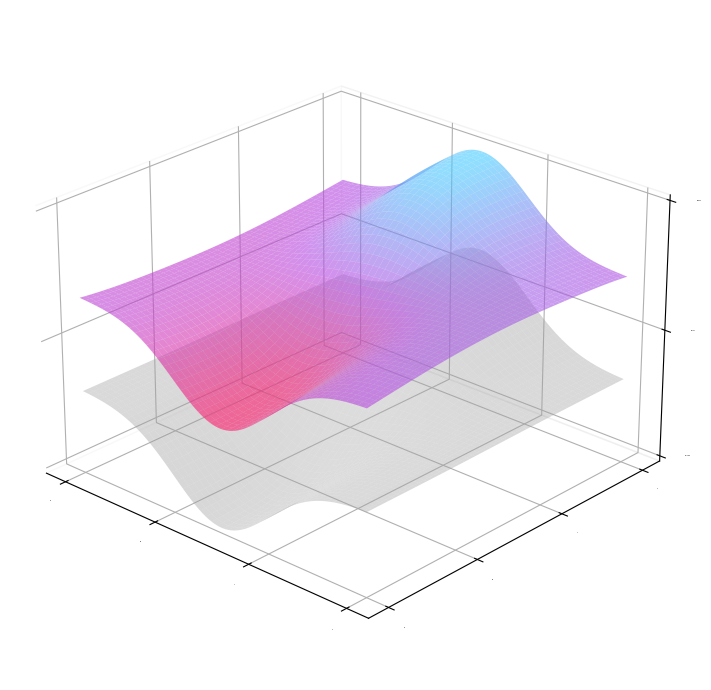

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from scipy.stats import multivariate_normal

# Define the 2D normal distribution parameters
mean = [0, 0]  # Mean of the distribution (centered at origin)
covariance = [[1, 0], [0, 1]]  # Covariance matrix (independent variables)

# Create a grid of points
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)

# Calculate the 2D normal distribution
pos = np.dstack((X, Y))
Z = multivariate_normal(mean, covariance).pdf(pos)

# Calculate the integral of the 2D normal distribution along the x-axis for each value of x
Z_integral = np.zeros_like(Z)
for i in range(len(x)):
    Z_integral[i, :] = np.trapz(Z[:i + 1, :], x[:i + 1], axis=0)

# Adjust the integrated function to reflect positive and negative contributions
Z_integral -= np.mean(Z_integral, axis=0)  # Center the values around zero

# Define custom colormap
colors = [(1, 27/255, 107/255), (181/255, 71/255, 225/255), (69/255, 202/255, 1)]  # FF1B6B to B547E1 to 45CAFF
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)

# Apply subtle random transformations to corners and edges
np.random.seed(42)  # For reproducibility
corner_spike1 = multivariate_normal([3, 3], [[1, 0], [0, 1]]).pdf(pos) * np.random.uniform(0.05, 0.1)
corner_spike2 = -multivariate_normal([-3, -3], [[1.5, 0], [0, 1.5]]).pdf(pos) * np.random.uniform(0.1, 0.15)
edge_wave = np.sin(X * np.random.uniform(0.3, 0.7)) * np.cos(Y * np.random.uniform(0.3, 0.7)) * 0.03

Z_integral_translated = Z_integral + 0.2 + corner_spike1 + corner_spike2 + edge_wave  # Combine subtle transformations

# Plot the two surfaces in 3D
fig = plt.figure(figsize=(12, 7), tight_layout=True)  # Remove extra white space
ax = fig.add_subplot(111, projection='3d')

# Plot the gray surface
surface1 = ax.plot_surface(X, Y, Z_integral - 0.05, color=(0.8274509803921568, 0.8274509803921568, 0.8274509803921568, 1.0), alpha=0.4, edgecolor='none')

# Plot the translated surface with the custom colormap
surface2 = ax.plot_surface(X, Y, Z_integral_translated, cmap=custom_cmap, alpha=0.6, edgecolor='none')

# Set gridlines with specific counts
ax.set_xticks(np.linspace(-3, 3, 4))  # 4 gridlines for x-axis
ax.set_yticks(np.linspace(-3, 3, 4))  # 4 gridlines for y-axis
ax.set_zticks(np.linspace(Z_integral.min() - 0.05, Z_integral_translated.max(), 3))  # 3 gridlines for z-axis
ax.tick_params(axis='both', which='major', labelsize=0)

# Set the background color to white
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Make the plot a cube with slightly taller height
ax.set_box_aspect([1.5, 1.5, 1])  # Adjust aspect ratio

# Set the viewpoint
ax.view_init(elev=25, azim=-47.5)

plt.savefig('3d_normal_distribution_plot.png')
plt.show()


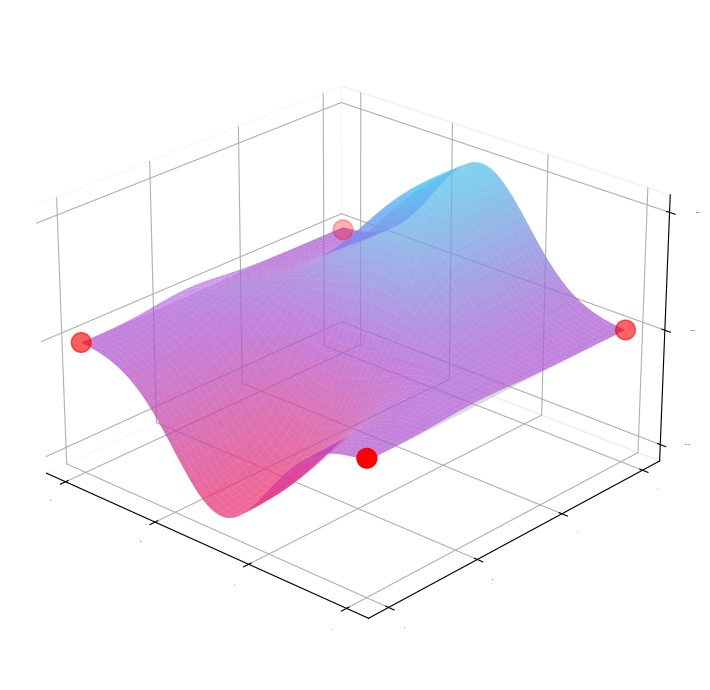

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from scipy.stats import multivariate_normal

# Define the 2D normal distribution parameters
mean = [0, 0]  # Mean of the distribution (centered at origin)
covariance = [[1, 0], [0, 1]]  # Covariance matrix (independent variables)

# Create a grid of points
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)

# Calculate the 2D normal distribution
pos = np.dstack((X, Y))
Z = multivariate_normal(mean, covariance).pdf(pos)

# Calculate the integral of the 2D normal distribution along the x-axis for each value of x
Z_integral = np.zeros_like(Z)
for i in range(len(x)):
    Z_integral[i, :] = np.trapz(Z[:i + 1, :], x[:i + 1], axis=0)

# Adjust the integrated function to reflect positive and negative contributions
Z_integral -= np.mean(Z_integral, axis=0)  # Center the values around zero

# Define custom colormap
colors = [(1, 27/255, 107/255), (181/255, 71/255, 225/255), (69/255, 202/255, 1)]  # FF1B6B to B547E1 to 45CAFF
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)

# Add random wide but short peaks near the center and along the x-axis, inverted to rise above the static gray surface
np.random.seed(42)  # For reproducibility
peaks = np.zeros_like(Z_integral)
for _ in range(5):
    center_x = np.random.uniform(-3, 3)
    center_y = np.random.uniform(-1, 1)
    width = np.random.uniform(0.5, 1.0)
    height = np.random.uniform(0.05, 0.1)  # Only positive heights for peaks
    peak = multivariate_normal([center_x, center_y], [[width, 0], [0, width]]).pdf(pos) * height
    peaks += peak

Z_integral_with_variations = Z_integral + peaks

# Plot the two surfaces in 3D
fig = plt.figure(figsize=(12, 7), tight_layout=True)  # Remove extra white space
ax = fig.add_subplot(111, projection='3d')

# Plot the gray surface
surface1 = ax.plot_surface(X, Y, Z_integral, color=(0.8274509803921568, 0.8274509803921568, 0.8274509803921568, 1.0), alpha=0.4, edgecolor='none')

# Plot the colored surface superimposed on the gray surface with variations
surface2 = ax.plot_surface(X, Y, Z_integral_with_variations, cmap=custom_cmap, alpha=0.6, edgecolor='none')

# Add red dots at the 4 corners of the surface
corners_x = [-3, -3, 3, 3]
corners_y = [-3, 3, -3, 3]
corners_z = [Z_integral_with_variations[0, 0], Z_integral_with_variations[0, -1], Z_integral_with_variations[-1, 0], Z_integral_with_variations[-1, -1]]
ax.scatter(corners_x, corners_y, corners_z, color='red', s=200)

# Set gridlines with specific counts
ax.set_xticks(np.linspace(-3, 3, 4))  # 4 gridlines for x-axis
ax.set_yticks(np.linspace(-3, 3, 4))  # 4 gridlines for y-axis
ax.set_zticks(np.linspace(Z_integral.min(), Z_integral_with_variations.max(), 3))  # 3 gridlines for z-axis
ax.tick_params(axis='both', which='major', labelsize=0)

# Set the background color to white
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Make the plot a cube with slightly taller height
ax.set_box_aspect([1.5, 1.5, 1])  # Adjust aspect ratio

# Set the viewpoint
ax.view_init(elev=25, azim=-47.5)

plt.savefig('3d_normal_distribution_plot.png')
plt.show()


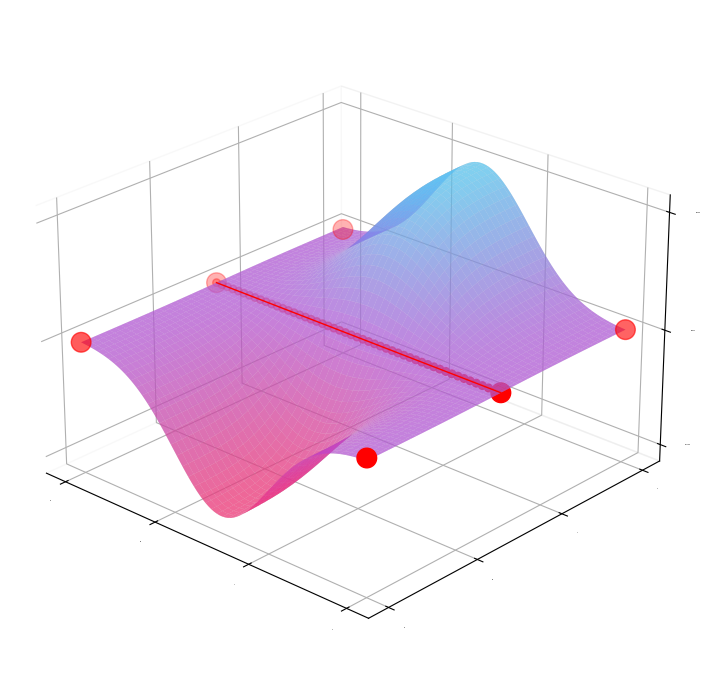

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from scipy.stats import multivariate_normal

# Define the 2D normal distribution parameters
mean = [0, 0]  # Mean of the distribution (centered at origin)
covariance = [[1, 0], [0, 1]]  # Covariance matrix (independent variables)

# Create a grid of points
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)

# Calculate the 2D normal distribution
pos = np.dstack((X, Y))
Z = multivariate_normal(mean, covariance).pdf(pos)

# Calculate the integral of the 2D normal distribution along the x-axis for each value of x
Z_integral = np.zeros_like(Z)
for i in range(len(x)):
    Z_integral[i, :] = np.trapz(Z[:i + 1, :], x[:i + 1], axis=0)

# Adjust the integrated function to reflect positive and negative contributions
Z_integral -= np.mean(Z_integral, axis=0)  # Center the values around zero

# Define custom colormap
colors = [(1, 27/255, 107/255), (181/255, 71/255, 225/255), (69/255, 202/255, 1)]  # FF1B6B to B547E1 to 45CAFF
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)

# Remove variations and use the original surface for the colored plot
Z_integral_with_variations = Z_integral

# Plot the two surfaces in 3D
fig = plt.figure(figsize=(12, 7), tight_layout=True)  # Remove extra white space
ax = fig.add_subplot(111, projection='3d')

# Plot the gray surface
surface1 = ax.plot_surface(X, Y, Z_integral, color=(0.8274509803921568, 0.8274509803921568, 0.8274509803921568, 1.0), alpha=0.4, edgecolor='none')

# Plot the colored surface superimposed on the gray surface
surface2 = ax.plot_surface(X, Y, Z_integral_with_variations, cmap=custom_cmap, alpha=0.6, edgecolor='none')

# Add red dots at the 4 corners of the surface
corners_x = [-3, -3, 3, 3]
corners_y = [-3, 3, -3, 3]
corners_z = [Z_integral_with_variations[0, 0], Z_integral_with_variations[0, -1], Z_integral_with_variations[-1, 0], Z_integral_with_variations[-1, -1]]
ax.scatter(corners_x, corners_y, corners_z, color='red', s=200)

# Add red dots at the endpoints of the x-axis on the surface
x_endpoints_x = [-3, 3]
x_endpoints_y = [0, 0]
x_endpoints_z = [Z_integral_with_variations[50, 0], Z_integral_with_variations[50, -1]]
ax.scatter(x_endpoints_x, x_endpoints_y, x_endpoints_z, color='red', s=200)

# Add a series of red dots along the x-axis between the endpoints and connect them with a line
line_x = np.linspace(-3, 3, 50)
line_y = np.zeros_like(line_x)
line_z = np.interp(line_x, x_endpoints_x, x_endpoints_z)  # Interpolate z values along the x-axis
ax.scatter(line_x, line_y, line_z, color='red', s=30, zorder=10)
ax.plot(line_x, line_y, line_z, color='red', linewidth=1, zorder=10)

# Set gridlines with specific counts
ax.set_xticks(np.linspace(-3, 3, 4))  # 4 gridlines for x-axis
ax.set_yticks(np.linspace(-3, 3, 4))  # 4 gridlines for y-axis
ax.set_zticks(np.linspace(Z_integral.min(), Z_integral_with_variations.max(), 3))  # 3 gridlines for z-axis
ax.tick_params(axis='both', which='major', labelsize=0)

# Set the background color to white
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Make the plot a cube with slightly taller height
ax.set_box_aspect([1.5, 1.5, 1])  # Adjust aspect ratio

# Set the viewpoint
ax.view_init(elev=25, azim=-47.5)

plt.savefig('3d_normal_distribution_plot.png')
plt.show()


Variances for each square:
[[0.59274731 0.34698186 0.18191907]
 [0.37024154 0.64754833 0.5926158 ]
 [0.1209004  0.5921676  0.7095982 ]]


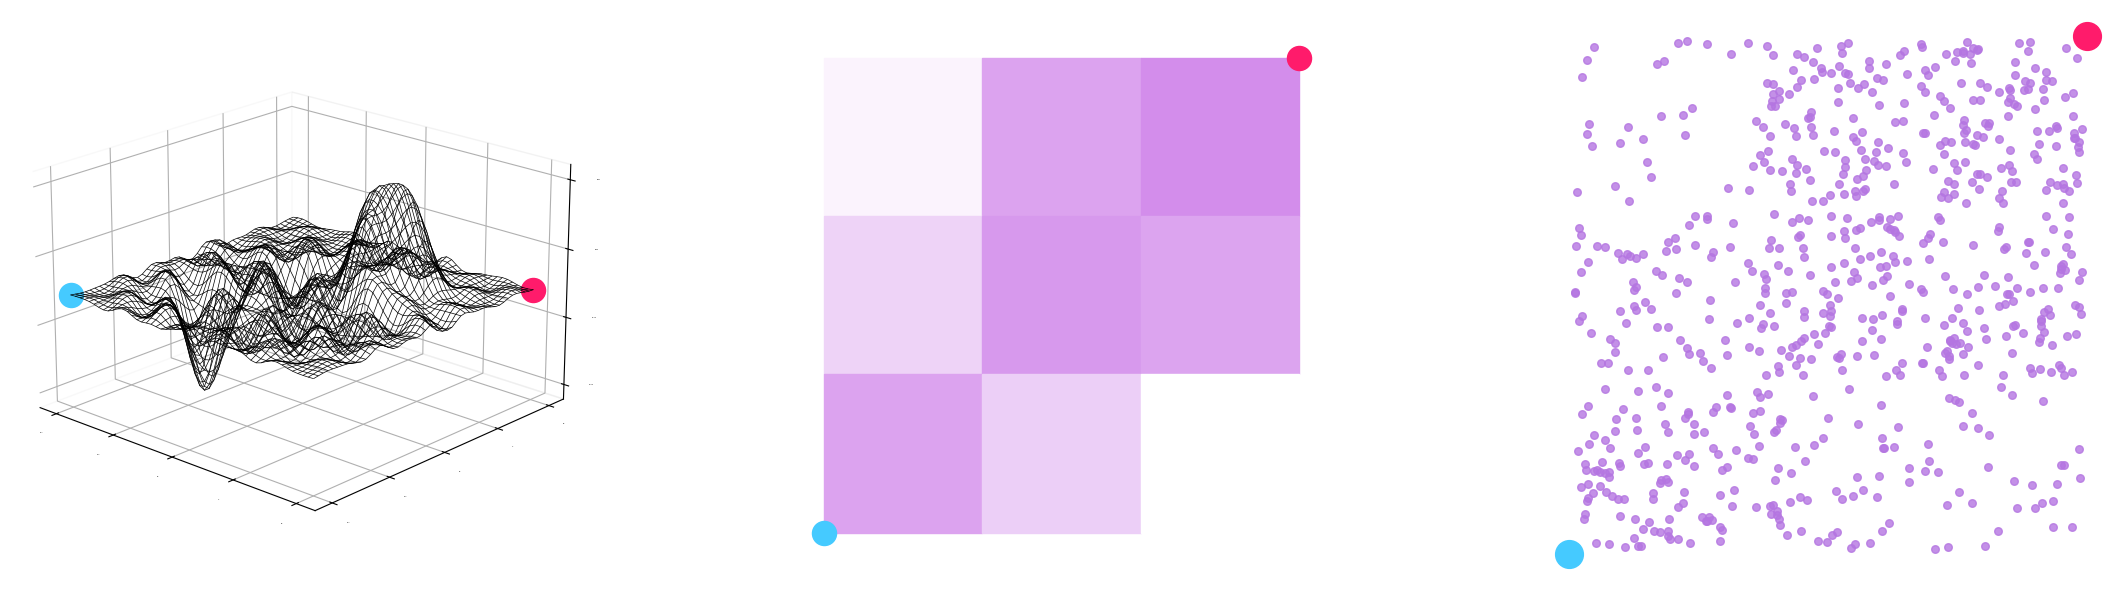

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.mplot3d import Axes3D

# Define parameters
num_dots = 750  # Total number of dots for the dot distribution plot
min_dots_per_square = 25  # Minimum dots per square

# Define the grid for the 3D surface
x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
X, Y = np.meshgrid(x, y)

# Generate Z with varying variability and another spike
Z = (
    np.sin(X * Y) * (np.exp(-0.1 * (X**2 + Y**2))) +
    0.5 * np.sin(3 * X) * np.cos(3 * Y) * (np.exp(-0.05 * (X**2 + Y**2))) +
    3 * np.exp(-((X - 2)**2 + (Y - 2)**2)) +
    -2 * np.exp(-((X + 2)**2 + (Y + 2)**2))  # Additional dip/spike with reduced depth
)

# Define custom colormap for the 3D plot and heatmap
colors_3d = [(1, 27/255, 107/255), (181/255, 71/255, 225/255), (69/255, 202/255, 1)]  # FF1B6B to B547E1 to 45CAFF
cmap_3d = LinearSegmentedColormap.from_list("cmap_3d", colors_3d)

colors_heatmap = [(1, 1, 1), (211/255, 141/255, 235/255)]  # Reverse: White to Less saturated purple
cmap_heatmap = LinearSegmentedColormap.from_list("cmap_heatmap", colors_heatmap)

# Compute variability in each region
variability = np.empty((3, 3))
x_edges = np.linspace(-5, 5, 4)
y_edges = np.linspace(-5, 5, 4)

for i in range(3):
    for j in range(3):
        region = Z[(X >= x_edges[i]) & (X < x_edges[i + 1]) & (Y >= y_edges[j]) & (Y < y_edges[j + 1])]
        variability[j, i] = np.std(region)  # Corrected indexing

# Print the variances for each square
print("Variances for each square:")
print(variability)

# Normalize variability for color mapping
variability_normalized = (variability - np.min(variability)) / (np.max(variability) - np.min(variability))

# Rotate variability matrix counterclockwise
rotated_variability = np.rot90(variability_normalized, k=1)

# Calculate dots for each square
dots_per_square = np.full((3, 3), min_dots_per_square)  # Start with the minimum number of dots
remaining_dots = num_dots - np.sum(dots_per_square)  # Remaining dots to distribute
if remaining_dots > 0:
    proportional_dots = (variability_normalized / np.sum(variability_normalized)) * remaining_dots
    dots_per_square += proportional_dots.astype(int)  # Distribute remaining dots proportionally

# Plot the 3D surface
fig = plt.figure(figsize=(24, 6))  # Increased spacing between plots
ax1 = fig.add_subplot(131, projection='3d')
wireframe = ax1.plot_wireframe(X, Y, Z, color='black', linewidth=0.5)

# Adjust 3D plot appearance
ax1.set_xticks(np.linspace(-5, 5, 5))  # Gridlines for x-axis
ax1.set_yticks(np.linspace(-5, 5, 5))  # Gridlines for y-axis
ax1.set_zticks(np.linspace(Z.min(), Z.max(), 4))  # Gridlines for z-axis
ax1.tick_params(axis='both', which='major', labelsize=0)  # Remove axis numbers
ax1.xaxis.pane.fill = False
ax1.yaxis.pane.fill = False
ax1.zaxis.pane.fill = False
ax1.grid(True, linestyle='-', color='gray', alpha=0.3)
ax1.set_box_aspect([1.5, 1.5, 1])  # Adjust aspect ratio
ax1.view_init(elev=20, azim=-47.5)

# Add markers to the 3D plot
ax1.scatter(-5, -5, Z[0, 0], color=(69/255, 202/255, 1), s=300, label="Bottom left marker")  # Blue marker
ax1.scatter(5, 5, Z[-1, -1], color=(1, 27/255, 107/255), s=300, label="Top right marker")  # Pink marker

# Plot the 2D variability heatmap
ax2 = fig.add_subplot(132)
x_centers = (x_edges[:-1] + x_edges[1:]) / 2
y_centers = (y_edges[:-1] + y_edges[1:]) / 2
X_centers, Y_centers = np.meshgrid(x_centers, y_centers)

for i in range(3):
    for j in range(3):
        rect = plt.Rectangle(
            (x_edges[j], y_edges[2 - i]),  # Apply rotation to positions
            x_edges[j + 1] - x_edges[j],
            y_edges[2 - i + 1] - y_edges[2 - i],
            color=cmap_heatmap(rotated_variability[i, j]),
        )
        ax2.add_patch(rect)

# Add markers to the heatmap
ax2.scatter(-5, -5, color=(69/255, 202/255, 1), s=300, label="Bottom left marker", zorder=10)  # Blue marker
ax2.scatter(5, 5, color=(1, 27/255, 107/255), s=300, label="Top right marker", zorder=10)  # Pink marker

# Ensure markers are not cut off
ax2.set_xlim([-6, 6])
ax2.set_ylim([-6, 6])
ax2.set_aspect('equal', adjustable='box')
ax2.axis('off')

# Plot the 2D dot distribution based on variability
ax3 = fig.add_subplot(133)
for i in range(3):
    for j in range(3):
        dots_in_square = dots_per_square[j, i]  # Final dot count per square
        if dots_in_square > 0:
            x_random = np.random.uniform(x_edges[i] + 0.1, x_edges[i + 1] - 0.1, dots_in_square)
            y_random = np.random.uniform(y_edges[j] + 0.1, y_edges[j + 1] - 0.1, dots_in_square)
            ax3.scatter(x_random, y_random, color="#B475E1", s=30, alpha=0.8)  # Purple dots

# Add markers to the dot distribution plot
ax3.scatter(-5, -5, color=(69/255, 202/255, 1), s=400, label="Bottom left marker", zorder=10)  # Blue marker
ax3.scatter(5, 5, color=(1, 27/255, 107/255), s=400, label="Top right marker", zorder=10)  # Pink marker

ax3.set_xlim([-5.5, 5.5])  # Extend limits slightly to fully show markers
ax3.set_ylim([-5.5, 5.5])
ax3.set_aspect('equal', adjustable='box')
ax3.axis('off')

# Save and display the figure
plt.tight_layout()
plt.savefig('variable_surface_plot_with_dots.png',dpi=400)
plt.show()


Variances for each square:
[[0.59274731 0.34698186 0.18191907]
 [0.37024154 0.64754833 0.5926158 ]
 [0.1209004  0.5921676  0.7095982 ]]


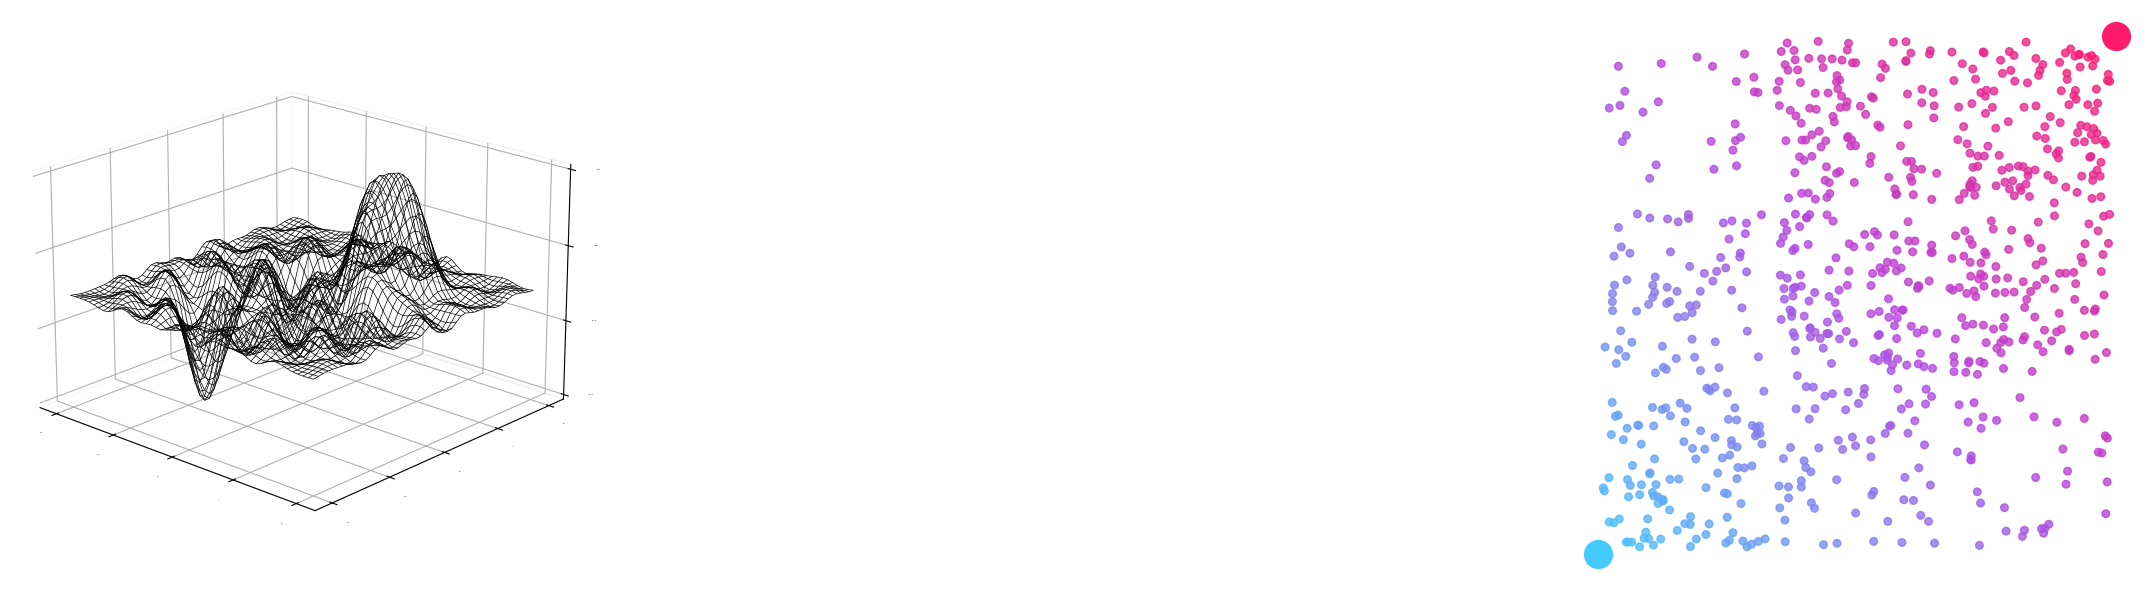

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.mplot3d import Axes3D

# Define parameters
num_dots = 750  # Total number of dots for the dot distribution plot
min_dots_per_square = 25  # Minimum dots per square

# Define the grid for the 3D surface
x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
X, Y = np.meshgrid(x, y)

# Generate Z with varying variability and another spike
Z = (
    np.sin(X * Y) * (np.exp(-0.1 * (X**2 + Y**2))) +
    0.5 * np.sin(3 * X) * np.cos(3 * Y) * (np.exp(-0.05 * (X**2 + Y**2))) +
    3 * np.exp(-((X - 2)**2 + (Y - 2)**2)) +
    -2 * np.exp(-((X + 2)**2 + (Y + 2)**2))  # Additional dip/spike with reduced depth
)

# Define custom colormap for the 3D plot and heatmap
colors_3d = [(1, 27/255, 107/255), (181/255, 71/255, 225/255), (69/255, 202/255, 1)]  # FF1B6B to B547E1 to 45CAFF
cmap_3d = LinearSegmentedColormap.from_list("cmap_3d", colors_3d)

dot_colors = LinearSegmentedColormap.from_list("dot_cmap", [
    (69/255, 202/255, 1),  # Blue
    (181/255, 71/255, 225/255),  # Purple
    (1, 27/255, 107/255)  # Pink
])

colors_heatmap = [(1, 1, 1), (211/255, 141/255, 235/255)]  # Reverse: White to Less saturated purple
cmap_heatmap = LinearSegmentedColormap.from_list("cmap_heatmap", colors_heatmap)

# Compute variability in each region
variability = np.empty((3, 3))
x_edges = np.linspace(-5, 5, 4)
y_edges = np.linspace(-5, 5, 4)

for i in range(3):
    for j in range(3):
        region = Z[(X >= x_edges[i]) & (X < x_edges[i + 1]) & (Y >= y_edges[j]) & (Y < y_edges[j + 1])]
        variability[j, i] = np.std(region)  # Corrected indexing

# Print the variances for each square
print("Variances for each square:")
print(variability)

# Normalize variability for color mapping
variability_normalized = (variability - np.min(variability)) / (np.max(variability) - np.min(variability))

# Rotate variability matrix counterclockwise
rotated_variability = np.rot90(variability_normalized, k=1)

# Calculate dots for each square
dots_per_square = np.full((3, 3), min_dots_per_square)  # Start with the minimum number of dots
remaining_dots = num_dots - np.sum(dots_per_square)  # Remaining dots to distribute
if remaining_dots > 0:
    proportional_dots = (variability_normalized / np.sum(variability_normalized)) * remaining_dots
    dots_per_square += proportional_dots.astype(int)  # Distribute remaining dots proportionally

# Plot the 3D surface
fig = plt.figure(figsize=(24, 6))  # Increased spacing between plots
ax1 = fig.add_subplot(131, projection='3d')
wireframe = ax1.plot_wireframe(X, Y, Z, color='black', linewidth=0.5)

# Adjust 3D plot appearance
ax1.set_xticks(np.linspace(-5, 5, 5))  # Gridlines for x-axis
ax1.set_yticks(np.linspace(-5, 5, 5))  # Gridlines for y-axis
ax1.set_zticks(np.linspace(Z.min(), Z.max(), 4))  # Gridlines for z-axis
ax1.tick_params(axis='both', which='major', labelsize=0)  # Remove axis numbers
ax1.xaxis.pane.fill = False
ax1.yaxis.pane.fill = False
ax1.zaxis.pane.fill = False
ax1.grid(True, linestyle='-', color='gray', alpha=0.3)
ax1.set_box_aspect([1.5, 1.5, 1])  # Adjust aspect ratio
ax1.view_init(elev=20, azim=-47.5)

# Plot the 2D dot distribution based on variability with gradient coloring
ax3 = fig.add_subplot(133)
for i in range(3):
    for j in range(3):
        dots_in_square = dots_per_square[j, i]  # Final dot count per square
        if dots_in_square > 0:
            x_random = np.random.uniform(x_edges[i] + 0.1, x_edges[i + 1] - 0.1, dots_in_square)
            y_random = np.random.uniform(y_edges[j] + 0.1, y_edges[j + 1] - 0.1, dots_in_square)
            dot_colors_gradient = dot_colors((x_random + y_random - 2 * np.min(x_edges)) / (2 * (np.max(x_edges) - np.min(x_edges))))
            ax3.scatter(x_random, y_random, color=dot_colors_gradient, s=30, alpha=0.8)

# Add markers to the dot distribution plot
ax3.scatter(-5, -5, color=(69/255, 202/255, 1), s=400, label="Bottom left marker", zorder=10)  # Blue marker
ax3.scatter(5, 5, color=(1, 27/255, 107/255), s=400, label="Top right marker", zorder=10)  # Pink marker

ax3.set_xlim([-5.5, 5.5])  # Extend limits slightly to fully show markers
ax3.set_ylim([-5.5, 5.5])
ax3.set_aspect('equal', adjustable='box')
ax3.axis('off')

# Save and display the figure
plt.tight_layout()
plt.savefig('variable_surface_plot_with_dots.png')
plt.show()


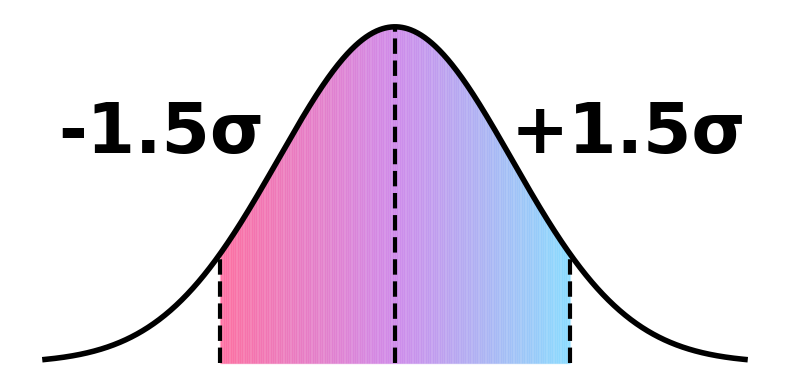

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from matplotlib.colors import LinearSegmentedColormap

# Define colors
shade_colors = [(1, 27/255, 107/255), (181/255, 71/255, 225/255), (69/255, 202/255, 1)]  # Pink to Purple to Blue gradient
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", shade_colors)

# Define x values and normal distribution
x = np.linspace(-3, 3, 1000)
y = norm.pdf(x, 0, 1)

# Create the plot
fig, ax = plt.subplots(figsize=(8, 4), dpi=100, tight_layout=True)
ax.plot(x, y, color="black", linewidth=4, alpha=1.0)  # Thicker bell curve line

# Shade region from -1.5σ to 1.5σ with a left-to-right gradient, bounded by the curve
x_fill = np.linspace(-1.5, 1.5, 500)
y_fill = norm.pdf(x_fill, 0, 1)

for i in range(len(x_fill) - 1):
    ax.fill_betweenx([0, y_fill[i]], x_fill[i], x_fill[i+1], color=custom_cmap(i / len(x_fill)), alpha=0.20)

# Dashed vertical lines at -1.5σ and +1.5σ
ax.plot([-1.5, -1.5], [0, norm.pdf(-1.5, 0, 1)], linestyle="--", color="black", linewidth=3)  # Thicker bounding lines
ax.plot([1.5, 1.5], [0, norm.pdf(1.5, 0, 1)], linestyle="--", color="black", linewidth=3)
ax.plot([0, 0], [0, norm.pdf(0, 0, 1)], linestyle="--", color="black", linewidth=3)  # Additional bounded dashed line at x=0

# Add text labels for -1.5σ and +1.5σ above the curve, making them larger
ax.text(-2.0, norm.pdf(-1.5, 0, 1) + 0.12, "-1.5σ", fontsize=50, fontweight='bold', ha='center')
ax.text(2.0, norm.pdf(1.5, 0, 1) + 0.12, "+1.5σ", fontsize=50, fontweight='bold', ha='center')

# Remove all extra elements
ax.set_xticks([])
ax.set_yticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Add a small amount of whitespace around the figure
plt.margins(0.05)

# Save the figure
plt.savefig("bell_curve.png", bbox_inches='tight', dpi=300)

plt.show()


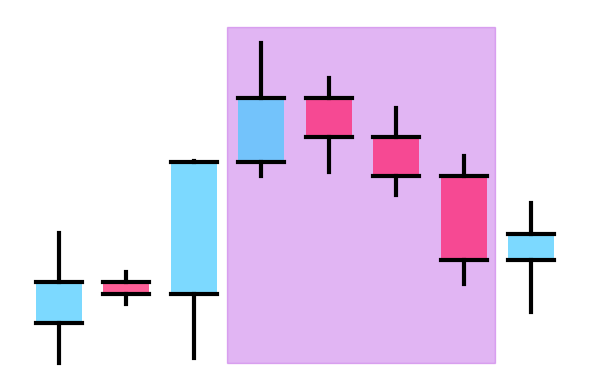

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Define colors
blue_color = (69/255, 202/255, 1)  # Blue for gains
pink_color = (1, 27/255, 107/255)  # Pink for losses
purple_color = (181/255, 71/255, 225/255)  # Purple for shaded region

# Generate more realistic stock market candlestick data with 8 candlesticks
np.random.seed(42)
n = 8
base_price = 100
opens = [base_price]
closes = []
highs = []
lows = []

# Ensure realistic trend where each open starts where the previous close ended
for i in range(n):
    if i > 0:
        opens.append(closes[i - 1])
    change = np.random.randn() * 1.5
    close = opens[i] + change
    high = max(opens[i], close) + np.random.rand() * 1.2
    low = min(opens[i], close) - np.random.rand() * 1.2
    closes.append(close)
    highs.append(high)
    lows.append(low)

dates = np.linspace(0, n - 1, n) * 0.45  # Maintain consistent spacing

# Create candlestick plot with realistic proportions
fig, ax = plt.subplots(figsize=(6, 4), dpi=100, tight_layout=True)
bar_width = 0.35 * (7/8)  # Reduce width to 7/8 of previous size

# Add wider and taller purple shaded region behind candlesticks from 4 to 7
ax.add_patch(patches.Rectangle(
    (dates[3] - bar_width + 0.075, min(lows) + 0.0),  # Start higher up
    (dates[6] - dates[3]) + bar_width * 2 - 0.175,  # End halfway after 7th candle
    (max(highs) - min(lows)) * 1.05,  # Extend higher
    color=purple_color, alpha=0.4, zorder=0  # Transparent purple background
))

for i in range(n):
    color = blue_color if closes[i] > opens[i] else pink_color
    ax.plot([dates[i], dates[i]], [lows[i], opens[i] if closes[i] > opens[i] else closes[i]], color="black", linewidth=3)  # Lower wick
    ax.plot([dates[i], dates[i]], [closes[i] if closes[i] > opens[i] else opens[i], highs[i]], color="black", linewidth=3)  # Upper wick
    rect = patches.Rectangle(
        (dates[i] - bar_width / 2, min(opens[i], closes[i])),
        bar_width, abs(opens[i] - closes[i]),
        facecolor=color, edgecolor=color, linewidth=0, fill=True, alpha=0.7  # No border on the rectangle itself
    )
    ax.add_patch(rect)
    ax.plot([dates[i] - bar_width / 2, dates[i] + bar_width / 2], [opens[i], opens[i]], color="black", linewidth=3)  # Top line
    ax.plot([dates[i] - bar_width / 2, dates[i] + bar_width / 2], [closes[i], closes[i]], color="black", linewidth=3)  # Bottom line

# Remove plot axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])

# Add a small amount of whitespace around the figure
plt.margins(0.05)

# Save the figure
plt.savefig("candlestick_minimalistic.png", bbox_inches='tight', dpi=300)

plt.show()


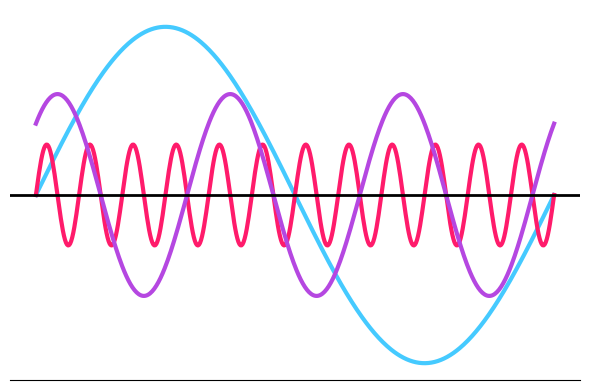

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define colors
blue_color = (69/255, 202/255, 1)  # Blue
pink_color = (1, 27/255, 107/255)  # Pink
purple_color = (181/255, 71/255, 225/255)  # Purple

# Generate x values (full domain)
x = np.linspace(0, 4 * np.pi, 500)

# Generate sine waves with different characteristics
y1 = np.sin(x * 0.5)  # Long wavelength (one period over the entire plot)
y2 = 0.3 * np.sin(6 * x)  # Small amplitude, short wavelength
y3 = 0.6 * np.sin(1.5 * x + np.pi / 4)  # Medium wavelength, medium amplitude

# Create the plot
fig, ax = plt.subplots(figsize=(6, 4), dpi=100, tight_layout=True)  # Slightly wider plot
ax.plot(x, y1, color=blue_color, linewidth=3)  # Thicker lines
ax.plot(x, y2, color=pink_color, linewidth=3)
ax.plot(x, y3, color=purple_color, linewidth=3)

# Draw a minimal x-axis in the middle
ax.axhline(0, color='black', linewidth=2)

# Remove all extra elements
ax.set_xticks([])
ax.set_yticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Add a small amount of whitespace around the figure
plt.margins(0.05)

# Save the figure
plt.savefig("sine_waves_minimalistic.png", bbox_inches='tight', dpi=300)

plt.show()


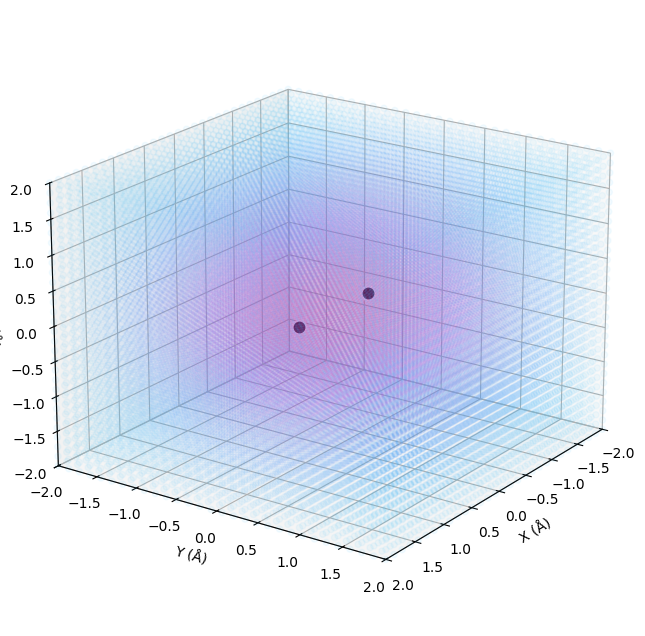

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LinearSegmentedColormap

# Define custom colormap
blue_color = (69/255, 202/255, 1)  # Blue
purple_color = (181/255, 71/255, 225/255)  # Purple
pink_color = (1, 27/255, 107/255)  # Pink
custom_cmap = LinearSegmentedColormap.from_list("custom", [blue_color, purple_color, pink_color])

# Define grid resolution
N = 50  # Higher resolution for smoother visualization

# Define spatial domain
x = np.linspace(-2, 2, N)  # Zoomed-in domain
y = np.linspace(-2, 2, N)
z = np.linspace(-2, 2, N)
X, Y, Z = np.meshgrid(x, y, z, indexing='ij')

# Oxygen atoms in O2 molecule (assumed bond distance ~1.21 Å)
atom1 = np.array([-0.605, 0.0, 0.0])
atom2 = np.array([ 0.605, 0.0, 0.0])

# Electron density parameters
sigma = 1.0  # Spread of the Gaussian function

# Approximate molecular orbitals (simplified superposition of atomic densities)
sigma_bonding = np.exp(-((X - atom1[0])**2 + Y**2 + Z**2) / (2 * sigma**2)) + \
                 np.exp(-((X - atom2[0])**2 + Y**2 + Z**2) / (2 * sigma**2))

# Lone pair density (assumed more concentrated around each oxygen atom)
lone_pair1 = np.exp(-((X - atom1[0])**2 + Y**2 + Z**2) / (2 * (sigma/2)**2))
lone_pair2 = np.exp(-((X - atom2[0])**2 + Y**2 + Z**2) / (2 * (sigma/2)**2))

# Total electron probability density
electron_density = sigma_bonding + lone_pair1 + lone_pair2

# Normalize for visualization
electron_density /= electron_density.max()

# Define visualization
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d', facecolor='white')
ax.set_xlim(-2, 2)  # Zoomed-in view
ax.set_ylim(-2, 2)
ax.set_zlim(-2, 2)
ax.set_xlabel("X (Å)")
ax.set_ylabel("Y (Å)")
ax.set_zlabel("Z (Å)")
ax.view_init(20, 35)  # Adjusted viewpoint

# Generate electron density wave-like representation
grid_size = 30
gx = np.linspace(-2, 2, grid_size)
gy = np.linspace(-2, 2, grid_size)
gz = np.linspace(-2, 2, grid_size)
gx, gy, gz = np.meshgrid(gx, gy, gz)

density_wave = np.exp(-((gx - atom1[0])**2 + gy**2 + gz**2) / (2 * sigma**2)) + \
               np.exp(-((gx - atom2[0])**2 + gy**2 + gz**2) / (2 * sigma**2))
density_wave /= density_wave.max()

scatter = ax.scatter(gx, gy, gz, c=density_wave, cmap=custom_cmap, alpha=0.06, marker='o')

# Plot the two oxygen atoms as black dots with clear interiors
ax.scatter(*atom1, color='black', s=100, edgecolors='white', linewidth=1.5, label='Oxygen Atom 1')
ax.scatter(*atom2, color='black', s=100, edgecolors='white', linewidth=1.5, label='Oxygen Atom 2')

plt.show()


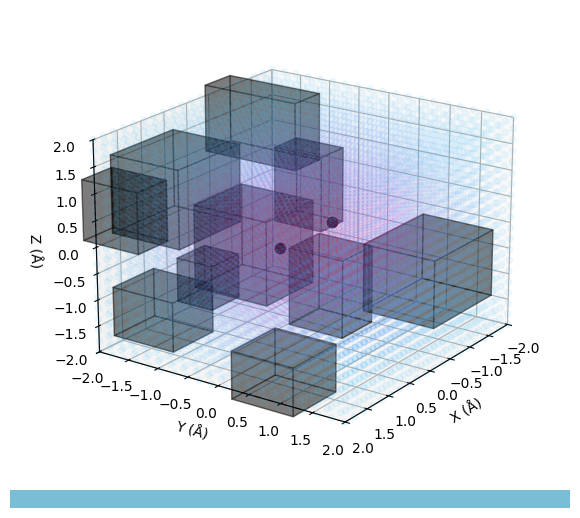

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # needed for 3D projection
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.animation import FuncAnimation, PillowWriter
import matplotlib.patches as patches

# ----------------------------
# Setup for molecular visualization
# ----------------------------

# Define custom colormap (used for the dot plot)
blue_color   = (69/255, 202/255, 1)       # Original blue
purple_color = (181/255, 71/255, 225/255)   # Purple
pink_color   = (1, 27/255, 107/255)         # Pink
custom_cmap  = LinearSegmentedColormap.from_list("custom",
                                                  [blue_color, purple_color, pink_color])

# Compute a less saturated version of blue by blending with gray.
# One simple approach: desat_blue = gray + 0.5*(blue - gray)
# Here, we take the average (gray) of the blue components.
gray = np.mean(blue_color)
desat_blue = tuple(gray + 0.5*(c - gray) for c in blue_color)
# For reference, the computed desat_blue is approximately (0.48, 0.74, 0.84).

# Define grid resolution and spatial domain
N = 40  # Lower resolution for faster processing
x = np.linspace(-2, 2, N)
y = np.linspace(-2, 2, N)
z = np.linspace(-2, 2, N)
X, Y, Z = np.meshgrid(x, y, z, indexing='ij')

# Oxygen atoms in O2 molecule (approximate positions)
atom1 = np.array([-0.605, 0.0, 0.0])
atom2 = np.array([ 0.605, 0.0, 0.0])

# Electron density parameters and densities
sigma = 1.0
sigma_bonding = np.exp(-((X - atom1[0])**2 + Y**2 + Z**2) / (2 * sigma**2)) + \
                np.exp(-((X - atom2[0])**2 + Y**2 + Z**2) / (2 * sigma**2))
lone_pair1 = np.exp(-((X - atom1[0])**2 + Y**2 + Z**2) / (2 * (sigma/2)**2))
lone_pair2 = np.exp(-((X - atom2[0])**2 + Y**2 + Z**2) / (2 * (sigma/2)**2))
electron_density = sigma_bonding + lone_pair1 + lone_pair2
electron_density /= electron_density.max()  # Normalize for visualization

# Generate a lower-resolution density wave representation
grid_size = 20  # Reduced for speed
gx, gy, gz = np.meshgrid(np.linspace(-2, 2, grid_size),
                         np.linspace(-2, 2, grid_size),
                         np.linspace(-2, 2, grid_size))
density_wave = np.exp(-((gx - atom1[0])**2 + gy**2 + gz**2) / (2 * sigma**2)) + \
               np.exp(-((gx - atom2[0])**2 + gy**2 + gz**2) / (2 * sigma**2))
density_wave /= density_wave.max()

# ----------------------------
# Figure setup
# ----------------------------

fig = plt.figure(figsize=(8, 6))
ax3d = fig.add_subplot(111, projection='3d', facecolor='white')
ax3d.set_xlim(-2, 2)
ax3d.set_ylim(-2, 2)
ax3d.set_zlim(-2, 2)
ax3d.set_xlabel("X (Å)")
ax3d.set_ylabel("Y (Å)")
ax3d.set_zlabel("Z (Å)")
ax3d.view_init(20, 35)

# Plot the two oxygen atoms and the low-opacity density points
ax3d.scatter(*atom1, color='black', s=100, edgecolors='white', linewidth=1.5)
ax3d.scatter(*atom2, color='black', s=100, edgecolors='white', linewidth=1.5)
ax3d.scatter(gx, gy, gz, c=density_wave, cmap=custom_cmap, alpha=0.08, marker='o')

# --- Setup a progress bar in a separate axes ---
progress_ax = fig.add_axes([0.15, 0.05, 0.7, 0.03])
progress_ax.set_xlim(0, 1)
progress_ax.set_ylim(0, 1)
progress_ax.axis('off')  # Hide ticks and frame
# Outline of the progress bar
progress_outline = patches.Rectangle((0, 0), 1, 1, edgecolor='black', facecolor='none', lw=1)
progress_ax.add_patch(progress_outline)
# Filled portion: using the desaturated blue
progress_fill = patches.Rectangle((0, 0), 0, 1, facecolor=desat_blue, edgecolor='none')
progress_ax.add_patch(progress_fill)

# ----------------------------
# Rectangle (progress) animation setup
# ----------------------------

num_rectangles  = 10        # Total number of rectangles to generate
frames_per_rect = 5         # Fewer frames per rectangle for speed
total_frames    = num_rectangles * frames_per_rect + 1  # +1 to show final state

# List to hold generated rectangles; each rectangle is defined as [x0, y0, z0, dx, dy, dz]
rectangles = []

def generate_rectangle():
    x0, y0, z0 = np.random.uniform(-2, 2, 3)
    dx, dy, dz = np.random.uniform(0.5, 1.5, 3)
    return [x0, y0, z0, dx, dy, dz]

# Start with the first rectangle
rectangles.append(generate_rectangle())

def update(frame):
    # --- Clear and set up the 3D axes (progress bar remains intact) ---
    ax3d.cla()
    ax3d.set_xlim(-2, 2)
    ax3d.set_ylim(-2, 2)
    ax3d.set_zlim(-2, 2)
    ax3d.set_xlabel("X (Å)")
    ax3d.set_ylabel("Y (Å)")
    ax3d.set_zlabel("Z (Å)")
    ax3d.view_init(20, 35)

    # Replot the oxygen atoms and density points
    ax3d.scatter(*atom1, color='black', s=100, edgecolors='white', linewidth=1.5)
    ax3d.scatter(*atom2, color='black', s=100, edgecolors='white', linewidth=1.5)
    ax3d.scatter(gx, gy, gz, c=density_wave, cmap=custom_cmap, alpha=0.08, marker='o')

    # Determine which rectangle we're filling:
    current_rect_index = frame // frames_per_rect
    frame_in_rect      = frame % frames_per_rect

    # If needed, generate a new rectangle for the current index
    if current_rect_index >= len(rectangles) and len(rectangles) < num_rectangles:
        rectangles.append(generate_rectangle())

    # --- Draw all fully completed rectangles ---
    for i in range(min(current_rect_index, len(rectangles))):
        x0, y0, z0, dx, dy, dz = rectangles[i]
        ax3d.bar3d(x0, y0, z0, dx, dy, dz, color='black', alpha=0.3, edgecolor='black')

    # --- Draw the current rectangle as partially filled (if available) ---
    if current_rect_index < num_rectangles:
        x0, y0, z0, dx, dy, dz = rectangles[current_rect_index]
        fill_fraction = (frame_in_rect + 1) / frames_per_rect
        ax3d.bar3d(x0, y0, z0, dx, dy, fill_fraction * dz, color='black', alpha=0.3, edgecolor='black')

    # --- Update the progress bar ---
    # Count how many rectangles are completely filled.
    complete_count = min(current_rect_index, num_rectangles)
    progress_fraction = complete_count / num_rectangles
    progress_fill.set_width(progress_fraction)

# ----------------------------
# Create and save the animation as a GIF using PillowWriter
# ----------------------------
ani = FuncAnimation(fig, update, frames=total_frames, interval=50)
writer = PillowWriter(fps=8)
ani.save("animation.gif", writer=writer)

plt.show()


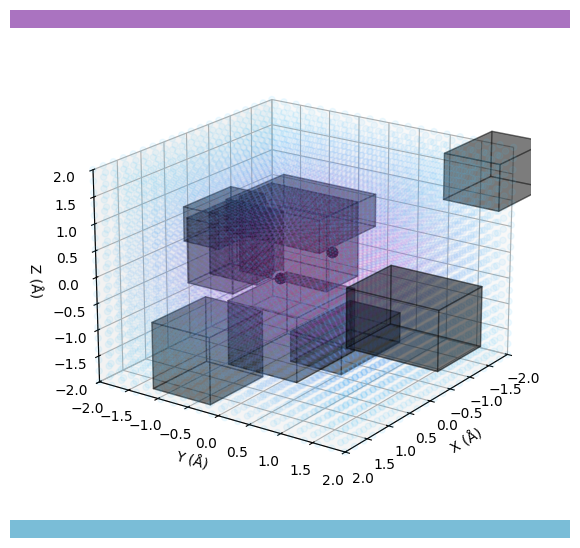

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 (needed for 3D projection)
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.animation import FuncAnimation, PillowWriter
import matplotlib.patches as patches

# ----------------------------
# Setup for molecular visualization
# ----------------------------

# Define custom colormap
blue_color   = (69/255, 202/255, 1)       # Blue
purple_color = (181/255, 71/255, 225/255)   # Purple
pink_color   = (1, 27/255, 107/255)         # Pink
custom_cmap  = LinearSegmentedColormap.from_list("custom",
                                                  [blue_color, purple_color, pink_color])

# Compute desaturated colors (blend with gray at 50%)
gray_for_blue   = np.mean(blue_color)
desat_blue = tuple(gray_for_blue + 0.5*(c - gray_for_blue) for c in blue_color)

gray_for_purple = np.mean(purple_color)
desat_purple = tuple(gray_for_purple + 0.5*(c - gray_for_purple) for c in purple_color)

# Define grid resolution and spatial domain
N = 40  # Lower resolution for faster processing
x = np.linspace(-2, 2, N)
y = np.linspace(-2, 2, N)
z = np.linspace(-2, 2, N)
X, Y, Z = np.meshgrid(x, y, z, indexing='ij')

# Oxygen atoms in O2 molecule (approximate positions)
atom1 = np.array([-0.605, 0.0, 0.0])
atom2 = np.array([ 0.605, 0.0, 0.0])

# Electron density parameters and densities
sigma = 1.0
sigma_bonding = np.exp(-((X - atom1[0])**2 + Y**2 + Z**2) / (2 * sigma**2)) + \
                np.exp(-((X - atom2[0])**2 + Y**2 + Z**2) / (2 * sigma**2))
lone_pair1 = np.exp(-((X - atom1[0])**2 + Y**2 + Z**2) / (2 * (sigma/2)**2))
lone_pair2 = np.exp(-((X - atom2[0])**2 + Y**2 + Z**2) / (2 * (sigma/2)**2))
electron_density = sigma_bonding + lone_pair1 + lone_pair2
electron_density /= electron_density.max()  # Normalize for visualization

# Generate a lower-resolution density wave representation
grid_size = 20  # Reduced for speed
gx, gy, gz = np.meshgrid(np.linspace(-2, 2, grid_size),
                         np.linspace(-2, 2, grid_size),
                         np.linspace(-2, 2, grid_size))
density_wave = np.exp(-((gx - atom1[0])**2 + gy**2 + gz**2) / (2 * sigma**2)) + \
               np.exp(-((gx - atom2[0])**2 + gy**2 + gz**2) / (2 * sigma**2))
density_wave /= density_wave.max()

# ----------------------------
# Figure and Axes setup
# ----------------------------

fig = plt.figure(figsize=(8, 6))

# 3D axes for the molecular visualization
ax3d = fig.add_subplot(111, projection='3d', facecolor='white')
ax3d.set_xlim(-2, 2)
ax3d.set_ylim(-2, 2)
ax3d.set_zlim(-2, 2)
ax3d.set_xlabel("X (Å)")
ax3d.set_ylabel("Y (Å)")
ax3d.set_zlabel("Z (Å)")
ax3d.view_init(20, 35)

# Top progress bar axes (for the self-filling progress bar)
top_progress_ax = fig.add_axes([0.15, 0.90, 0.7, 0.03])
top_progress_ax.set_xlim(0, 1)
top_progress_ax.set_ylim(0, 1)
top_progress_ax.axis('off')
top_progress_outline = patches.Rectangle((0, 0), 1, 1,
                                         edgecolor='black', facecolor='none', lw=1)
top_progress_ax.add_patch(top_progress_outline)
# Use the desaturated purple for the top progress fill.
top_progress_fill = patches.Rectangle((0, 0), 0, 1,
                                      facecolor=desat_purple, edgecolor='none')
top_progress_ax.add_patch(top_progress_fill)

# Bottom progress bar axes (for the rectangle animation progress)
bottom_progress_ax = fig.add_axes([0.15, 0.05, 0.7, 0.03])
bottom_progress_ax.set_xlim(0, 1)
bottom_progress_ax.set_ylim(0, 1)
bottom_progress_ax.axis('off')
bottom_progress_outline = patches.Rectangle((0, 0), 1, 1,
                                            edgecolor='black', facecolor='none', lw=1)
bottom_progress_ax.add_patch(bottom_progress_outline)
# Use the desaturated blue for the bottom progress fill.
bottom_progress_fill = patches.Rectangle((0, 0), 0, 1,
                                           facecolor=desat_blue, edgecolor='none')
bottom_progress_ax.add_patch(bottom_progress_fill)

# ----------------------------
# Rectangle Animation Setup
# ----------------------------

num_rectangles = 10  # Total number of rectangles
# For the main part, the rectangles appear instantly—so pre-generate them:
def generate_rectangle():
    x0, y0, z0 = np.random.uniform(-2, 2, 3)
    dx, dy, dz = np.random.uniform(0.5, 1.5, 3)
    return [x0, y0, z0, dx, dy, dz]

rectangles = [generate_rectangle() for _ in range(num_rectangles)]

# Timing parameters
frames_top = 12                # Top progress bar fills over 12 frames (~1.5 sec at 8 fps)
frames_main = num_rectangles + 1  # One frame per rectangle plus one final frame
total_frames = frames_top + frames_main

# ----------------------------
# Animation Update Function
# ----------------------------

def update(frame):
    # Clear and set up the 3D axes
    ax3d.cla()
    ax3d.set_xlim(-2, 2)
    ax3d.set_ylim(-2, 2)
    ax3d.set_zlim(-2, 2)
    ax3d.set_xlabel("X (Å)")
    ax3d.set_ylabel("Y (Å)")
    ax3d.set_zlabel("Z (Å)")
    ax3d.view_init(20, 35)

    # Re-plot the static molecular scene: oxygen atoms and density points
    ax3d.scatter(*atom1, color='black', s=100, edgecolors='white', linewidth=1.5)
    ax3d.scatter(*atom2, color='black', s=100, edgecolors='white', linewidth=1.5)
    ax3d.scatter(gx, gy, gz, c=density_wave, cmap=custom_cmap, alpha=0.08, marker='o')

    if frame < frames_top:
        # ----- Part 1: Top progress bar fills automatically -----
        # Calculate fill fraction for the top progress bar.
        top_fraction = (frame + 1) / frames_top
        top_progress_fill.set_width(top_fraction)
        # Leave bottom progress bar empty.
        bottom_progress_fill.set_width(0)

    else:
        # ----- Part 2: Main animation: instant rectangle rendering -----
        # Ensure the top progress bar is completely filled.
        top_progress_fill.set_width(1)

        # Compute which frame of the main part we are in.
        main_frame = frame - frames_top
        # Each frame, one more rectangle appears (instant fill).
        current_rect_index = min(main_frame + 1, num_rectangles)

        # Draw all rectangles up to the current index, rendered fully.
        for i in range(current_rect_index):
            x0, y0, z0, dx, dy, dz = rectangles[i]
            ax3d.bar3d(x0, y0, z0, dx, dy, dz,
                       color='black', alpha=0.3, edgecolor='black')

        # Update the bottom progress bar.
        bottom_fraction = current_rect_index / num_rectangles
        bottom_progress_fill.set_width(bottom_fraction)

# ----------------------------
# Create and Save the Animation as a GIF using PillowWriter
# ----------------------------

ani = FuncAnimation(fig, update, frames=total_frames, interval=50)
writer = PillowWriter(fps=8)
ani.save("animation1.gif", writer=writer)

plt.show()


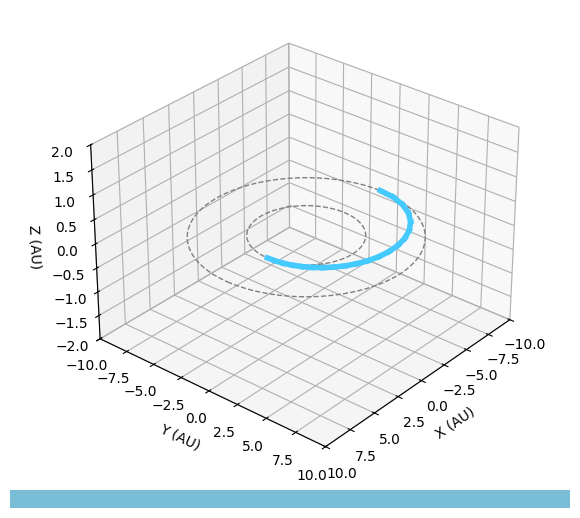

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # needed for 3D projection
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.animation import FuncAnimation, PillowWriter
import matplotlib.patches as patches

# ----------------------------
# Define Custom Colors and Colormap
# ----------------------------
blue_color   = (69/255, 202/255, 1)       # Original blue
purple_color = (181/255, 71/255, 225/255)   # Purple
pink_color   = (1, 27/255, 107/255)         # Pink
custom_cmap  = LinearSegmentedColormap.from_list("custom",
                                                  [blue_color, purple_color, pink_color])
# Compute desaturated blue (for progress bar)
gray = np.mean(blue_color)
desat_blue = tuple(gray + 0.5*(c - gray) for c in blue_color)

# ----------------------------
# Orbital Parameters (Hohmann Transfer)
# ----------------------------
r1 = 4.0    # Inner circular orbit radius (AU)
r2 = 8.0    # Outer circular orbit radius (AU)

# For a Hohmann transfer between two circular orbits:
# The transfer ellipse has:
a_transfer = (r1 + r2) / 2.0         # semi-major axis
e_transfer = (r2 - r1) / (r1 + r2)     # eccentricity
p_transfer = a_transfer * (1 - e_transfer**2)  # semi-latus rectum

# Define the transfer orbit arc (only half an ellipse is needed)
theta_start = 0
theta_end   = np.pi  # from perigee (inner orbit) to apogee (outer orbit)
theta_vals = np.linspace(theta_start, theta_end, 300)
r_vals = p_transfer / (1 + e_transfer * np.cos(theta_vals))
x_transfer = r_vals * np.cos(theta_vals)
y_transfer = r_vals * np.sin(theta_vals)
z_transfer = np.zeros_like(x_transfer)

# ----------------------------
# Reference Orbits: Inner and Outer (Full Circles)
# ----------------------------
theta_full = np.linspace(0, 2*np.pi, 300)
x_inner = r1 * np.cos(theta_full)
y_inner = r1 * np.sin(theta_full)
z_inner = np.zeros_like(x_inner)
x_outer = r2 * np.cos(theta_full)
y_outer = r2 * np.sin(theta_full)
z_outer = np.zeros_like(x_outer)

# ----------------------------
# Setup Integration Segments along the Transfer Orbit
# ----------------------------
num_segments = 20   # More segments for a gradual (slower) buildup
theta_segments = np.linspace(theta_start, theta_end, num_segments + 1)
segments = []
for i in range(num_segments):
    t0 = theta_segments[i]
    t1 = theta_segments[i+1]
    r0 = p_transfer / (1 + e_transfer * np.cos(t0))
    r1_val = p_transfer / (1 + e_transfer * np.cos(t1))
    x0, y0 = r0 * np.cos(t0), r0 * np.sin(t0)
    x1, y1 = r1_val * np.cos(t1), r1_val * np.sin(t1)
    segments.append(((x0, y0), (x1, y1)))

# ----------------------------
# Figure and Axes Setup
# ----------------------------
fig = plt.figure(figsize=(8, 6))
ax3d = fig.add_subplot(111, projection='3d', facecolor='white')
limit = r2 + 2
ax3d.set_xlim(-limit, limit)
ax3d.set_ylim(-limit, limit)
ax3d.set_zlim(-2, 2)
ax3d.set_xlabel("X (AU)")
ax3d.set_ylabel("Y (AU)")
ax3d.set_zlabel("Z (AU)")
ax3d.view_init(30, 40)

# Plot Reference Orbits (inner, outer, and full transfer orbit as a faint guide)
ax3d.plot(x_inner, y_inner, z_inner, color='gray', linestyle='--', linewidth=1, label="Inner Orbit")
ax3d.plot(x_outer, y_outer, z_outer, color='gray', linestyle='--', linewidth=1, label="Outer Orbit")
ax3d.plot(x_transfer, y_transfer, z_transfer, color='lightgray', linestyle='--', linewidth=1, label="Transfer Orbit")

# ----------------------------
# Progress Bar Setup (Bottom)
# ----------------------------
progress_ax = fig.add_axes([0.15, 0.05, 0.7, 0.03])
progress_ax.set_xlim(0, 1)
progress_ax.set_ylim(0, 1)
progress_ax.axis('off')  # Hide ticks and borders
progress_outline = patches.Rectangle((0, 0), 1, 1, edgecolor='black', facecolor='none', lw=1)
progress_ax.add_patch(progress_outline)
progress_fill = patches.Rectangle((0, 0), 0, 1, facecolor=desat_blue, edgecolor='none')
progress_ax.add_patch(progress_fill)

# ----------------------------
# Animation Parameters
# ----------------------------
frames_per_segment = 5
total_frames = num_segments * frames_per_segment + 1

def update(frame):
    ax3d.cla()  # Clear axes for the next frame
    ax3d.set_xlim(-limit, limit)
    ax3d.set_ylim(-limit, limit)
    ax3d.set_zlim(-2, 2)
    ax3d.set_xlabel("X (AU)")
    ax3d.set_ylabel("Y (AU)")
    ax3d.set_zlabel("Z (AU)")
    ax3d.view_init(30, 40)

    # Replot reference orbits
    ax3d.plot(x_inner, y_inner, z_inner, color='gray', linestyle='--', linewidth=1)
    ax3d.plot(x_outer, y_outer, z_outer, color='gray', linestyle='--', linewidth=1)
    ax3d.plot(x_transfer, y_transfer, z_transfer, color='lightgray', linestyle='--', linewidth=1)

    # Determine the current integration segment and frame within that segment
    current_segment = frame // frames_per_segment
    inner_frame = frame % frames_per_segment

    # Draw completed segments along the transfer orbit
    for i in range(min(current_segment, num_segments)):
        (x0, y0), (x1, y1) = segments[i]
        ax3d.plot([x0, x1], [y0, y1], [0, 0], color=blue_color, linewidth=4)

    # Draw the current segment as partially filled
    if current_segment < num_segments:
        (x0, y0), (x1, y1) = segments[current_segment]
        frac = (inner_frame + 1) / frames_per_segment
        xi = x0 + frac * (x1 - x0)
        yi = y0 + frac * (y1 - y0)
        ax3d.plot([x0, xi], [y0, yi], [0, 0], color=blue_color, linewidth=4)

    # Update the progress bar (fill proportionate to segments completed)
    progress_fraction = min(current_segment / num_segments, 1)
    progress_fill.set_width(progress_fraction)

# ----------------------------
# Create and Save the Animation as a GIF
# ----------------------------
ani = FuncAnimation(fig, update, frames=total_frames, interval=100)
writer = PillowWriter(fps=8)
ani.save("traditional_orbital_transfer.gif", writer=writer)

plt.show()


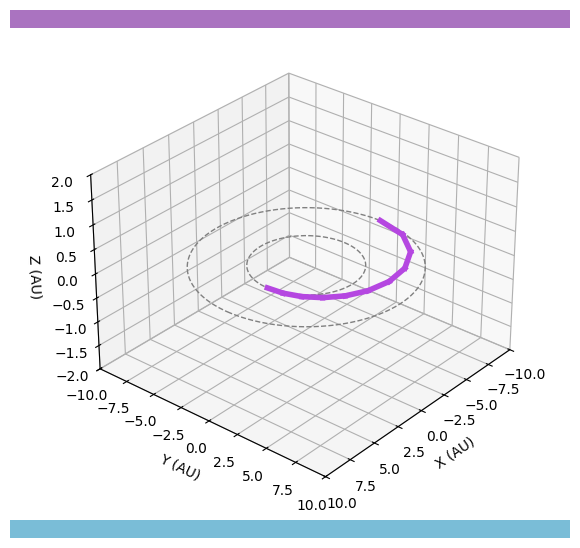

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # for 3D projection
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.animation import FuncAnimation, PillowWriter
import matplotlib.patches as patches

# ----------------------------
# Define Custom Colors and Colormap
# ----------------------------
blue_color   = (69/255, 202/255, 1)       # Original blue
purple_color = (181/255, 71/255, 225/255)   # Purple
pink_color   = (1, 27/255, 107/255)         # Pink
custom_cmap  = LinearSegmentedColormap.from_list("custom",
                                                  [blue_color, purple_color, pink_color])

# Compute desaturated colors for progress bars
gray_blue   = np.mean(blue_color)
desat_blue  = tuple(gray_blue + 0.5*(c - gray_blue) for c in blue_color)
gray_purple = np.mean(purple_color)
desat_purple = tuple(gray_purple + 0.5*(c - gray_purple) for c in purple_color)

# ----------------------------
# Orbital Parameters (Hohmann Transfer)
# ----------------------------
r1 = 4.0    # Inner circular orbit radius (AU)
r2 = 8.0    # Outer circular orbit radius (AU)
a_transfer = (r1 + r2) / 2.0         # Semi-major axis for transfer ellipse
e_transfer = (r2 - r1) / (r1 + r2)     # Eccentricity for transfer ellipse
p_transfer = a_transfer * (1 - e_transfer**2)  # Semi-latus rectum

# Define the transfer orbit arc (from perigee to apogee)
theta_start = 0
theta_end   = np.pi  # Transfer from perigee (inner orbit) to apogee (outer orbit)
theta_vals = np.linspace(theta_start, theta_end, 300)
r_vals = p_transfer / (1 + e_transfer * np.cos(theta_vals))
x_transfer = r_vals * np.cos(theta_vals)
y_transfer = r_vals * np.sin(theta_vals)
z_transfer = np.zeros_like(x_transfer)

# ----------------------------
# Reference Orbits: Inner and Outer (Full Circles)
# ----------------------------
theta_full = np.linspace(0, 2*np.pi, 300)
x_inner = r1 * np.cos(theta_full)
y_inner = r1 * np.sin(theta_full)
z_inner = np.zeros_like(x_inner)
x_outer = r2 * np.cos(theta_full)
y_outer = r2 * np.sin(theta_full)
z_outer = np.zeros_like(x_outer)

# ----------------------------
# Setup Integration Segments along the Transfer Orbit
# ----------------------------
num_segments = 10   # Fewer segments to mimic faster (neural) integration
theta_segments = np.linspace(theta_start, theta_end, num_segments + 1)
segments = []
for i in range(num_segments):
    t0 = theta_segments[i]
    t1 = theta_segments[i+1]
    r0 = p_transfer / (1 + e_transfer * np.cos(t0))
    r1_val = p_transfer / (1 + e_transfer * np.cos(t1))
    x0, y0 = r0 * np.cos(t0), r0 * np.sin(t0)
    x1, y1 = r1_val * np.cos(t1), r1_val * np.sin(t1)
    segments.append(((x0, y0), (x1, y1)))

# ----------------------------
# Figure and Axes Setup
# ----------------------------
fig = plt.figure(figsize=(8, 6))
ax3d = fig.add_subplot(111, projection='3d', facecolor='white')
limit = r2 + 2
ax3d.set_xlim(-limit, limit)
ax3d.set_ylim(-limit, limit)
ax3d.set_zlim(-2, 2)
ax3d.set_xlabel("X (AU)")
ax3d.set_ylabel("Y (AU)")
ax3d.set_zlabel("Z (AU)")
ax3d.view_init(30, 40)

# ----------------------------
# Progress Bars Setup
# ----------------------------
# Top progress bar (purple): fills gradually.
top_progress_ax = fig.add_axes([0.15, 0.90, 0.7, 0.03])
top_progress_ax.set_xlim(0, 1)
top_progress_ax.set_ylim(0, 1)
top_progress_ax.axis('off')
top_outline = patches.Rectangle((0, 0), 1, 1, edgecolor='black', facecolor='none', lw=1)
top_progress_ax.add_patch(top_outline)
top_progress_fill = patches.Rectangle((0, 0), 0, 1, facecolor=desat_purple, edgecolor='none')
top_progress_ax.add_patch(top_progress_fill)

# Bottom progress bar (blue): fills nearly instantly as segments are drawn.
bottom_progress_ax = fig.add_axes([0.15, 0.05, 0.7, 0.03])
bottom_progress_ax.set_xlim(0, 1)
bottom_progress_ax.set_ylim(0, 1)
bottom_progress_ax.axis('off')
bottom_outline = patches.Rectangle((0, 0), 1, 1, edgecolor='black', facecolor='none', lw=1)
bottom_progress_ax.add_patch(bottom_outline)
bottom_progress_fill = patches.Rectangle((0, 0), 0, 1, facecolor=desat_blue, edgecolor='none')
bottom_progress_ax.add_patch(bottom_progress_fill)

# ----------------------------
# Animation Timing Parameters
# ----------------------------
frames_top = 12              # Number of frames for the top (purple) progress bar to fill gradually
frames_per_segment = 3       # Frames per integration segment for the main phase
frames_main = num_segments * frames_per_segment  # Main phase duration
total_frames = frames_top + frames_main + 1

def update(frame):
    # ------------------------
    # Phase 1: Top progress bar fills gradually
    # ------------------------
    if frame < frames_top:
        ax3d.cla()  # Clear the 3D axes
        # Reset axes settings and view
        ax3d.set_xlim(-limit, limit)
        ax3d.set_ylim(-limit, limit)
        ax3d.set_zlim(-2, 2)
        ax3d.set_xlabel("X (AU)")
        ax3d.set_ylabel("Y (AU)")
        ax3d.set_zlabel("Z (AU)")
        ax3d.view_init(30, 40)
        # Plot reference orbits for context
        ax3d.plot(x_inner, y_inner, z_inner, color='gray', linestyle='--', linewidth=1)
        ax3d.plot(x_outer, y_outer, z_outer, color='gray', linestyle='--', linewidth=1)
        ax3d.plot(x_transfer, y_transfer, z_transfer, color='lightgray', linestyle='--', linewidth=1)

        # Update top progress bar gradually
        top_fraction = (frame + 1) / frames_top
        top_progress_fill.set_width(top_fraction)
        # Ensure bottom progress bar remains empty during phase 1
        bottom_progress_fill.set_width(0)

    # ------------------------
    # Phase 2: Integration segments & bottom progress bar fill rapidly
    # ------------------------
    else:
        main_frame = frame - frames_top
        ax3d.cla()
        ax3d.set_xlim(-limit, limit)
        ax3d.set_ylim(-limit, limit)
        ax3d.set_zlim(-2, 2)
        ax3d.set_xlabel("X (AU)")
        ax3d.set_ylabel("Y (AU)")
        ax3d.set_zlabel("Z (AU)")
        ax3d.view_init(30, 40)
        # Replot reference orbits
        ax3d.plot(x_inner, y_inner, z_inner, color='gray', linestyle='--', linewidth=1)
        ax3d.plot(x_outer, y_outer, z_outer, color='gray', linestyle='--', linewidth=1)
        ax3d.plot(x_transfer, y_transfer, z_transfer, color='lightgray', linestyle='--', linewidth=1)

        # For a rapid, near-instant update, use ceiling so segments appear fully drawn
        current_segment = int(np.ceil(main_frame / frames_per_segment))
        current_segment = min(current_segment, num_segments)

        # Draw all completed segments
        for i in range(current_segment):
            (x0, y0), (x1, y1) = segments[i]
            ax3d.plot([x0, x1], [y0, y1], [0, 0], color=purple_color, linewidth=4)

        # Set top progress bar to fully filled during phase 2
        top_progress_fill.set_width(1)
        # Update bottom progress bar to reflect instantaneous segment completion
        bottom_fraction = current_segment / num_segments
        bottom_progress_fill.set_width(bottom_fraction)

# ----------------------------
# Create and Save the Animation as a GIF
# ----------------------------
ani = FuncAnimation(fig, update, frames=total_frames, interval=80)
writer = PillowWriter(fps=10)
ani.save("neural_orbital_transfer.gif", writer=writer)

plt.show()
